## Importing required libraries

In [102]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as py
import seaborn as sns
from sklearn.decomposition import PCA
from numpy import array, mean, cov
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option("display.max_columns", 60)

## Loading data

Loading raw dataframes generated from the xml's

In [3]:
datafilenamepath = "C:\\Users\\edidd\\Documents\\Ubiqum\\Data Analytics Course\\Project_Heike2\\Data"

In [4]:
df_195_1 = pd.read_csv(os.path.join(datafilenamepath, "195_df_2019-10_to_2020-01.csv"))


In [5]:
df_195_2 = pd.read_csv(os.path.join(datafilenamepath, "195_2019-01-01_to_2019-09-30.csv"))

Merging dataframes

In [6]:
df_195 = pd.concat([df_195_1, df_195_2], sort = True)

Loading infoloc. infoloc contains the power thresholds for each installation, needed to subset the power on / power off data in further steps

In [7]:
infoloc = pd.read_csv(os.path.join(datafilenamepath, "infoloc.csv"))

## Pre-processing

### Cleaning up the data

Raw dataframe:

In [8]:
df_195

% capacidad recuperacion U3  Alarma U1  Alarma U2  Alarma U3  \
0                               NaN        NaN        NaN        NaN   
1                               0.0        0.0        0.0        0.0   
2                               NaN        NaN        NaN        NaN   
3                               NaN        NaN        NaN        NaN   
4                               NaN        NaN        NaN        NaN   
...                             ...        ...        ...        ...   
161828                          NaN        NaN        NaN        NaN   
161829                          NaN        NaN        NaN        NaN   
161830                          NaN        NaN        NaN        NaN   
161831                          NaN        NaN        NaN        NaN   
161832                          NaN        NaN        NaN        NaN   

        Algoritmos  Capacidad carga U1  Capacidad carga U2  \
0              NaN                50.0                50.0   
1              1.0                 NaN                 NaN   
2              NaN                 NaN                 NaN   
3              NaN                 NaN                 NaN   
4              NaN                 NaN                 NaN   
...            ...                 ...                 ...   
161828         NaN                 NaN                 NaN   
161829         NaN                 NaN                 NaN   
161830         NaN                 NaN                 NaN   
161831         NaN                 NaN                 NaN   
161832         NaN                 NaN                 NaN   

        Capacidad carga U3  Consigna sistema  Enfriadora 1  Enfriadora 2  \
0                      NaN              10.0      741418.1      549166.7   
1                      0.0               NaN           NaN           NaN   
2                      NaN               NaN           NaN           NaN   
3                      NaN               NaN           NaN           NaN   
4                      NaN              10.0           NaN           NaN   
...                    ...               ...           ...           ...   
161828                 NaN              12.5           NaN           NaN   
161829                 NaN               NaN           NaN           NaN   
161830                 NaN               NaN           NaN           NaN   
161831                 NaN               NaN           NaN           NaN   
161832                 NaN               NaN           NaN           NaN   

        Enfriadora 3  FP General Hotel  General Hotel  Paro - marcha U1  \
0           390757.3              0.99     15341888.0               NaN   
1                NaN               NaN            NaN               1.0   
2                NaN               NaN            NaN               NaN   
3                NaN               NaN            NaN               NaN   
4                NaN               NaN            NaN               NaN   
...              ...               ...            ...               ...   
161828           NaN               NaN            NaN               NaN   
161829           NaN               NaN            NaN               NaN   
161830           NaN               NaN            NaN               NaN   
161831           NaN               NaN            NaN               NaN   
161832           NaN              0.99     15341888.0               NaN   

        Paro - marcha U2  Paro - marcha U3  Potencia Activa U3  \
0                    NaN               NaN                0.45   
1                    1.0               0.0                 NaN   
2                    NaN               NaN                0.45   
3                    NaN               NaN                 NaN   
4                    NaN               NaN                0.45   
...                  ...               ...                 ...   
161828               NaN               NaN                0.45   
161829               NaN               NaN              

Dropping variables not needed

In [9]:
df_195 = df_195.drop(['Paro - marcha U1', 'Paro - marcha U2', 'Alarma U1',
       'Alarma U2', 'Capacidad carga U1', 'Capacidad carga U2',
       'Capacidad carga U3', 'Alarma U3', 'Algoritmos', 'Paro - marcha U3', '% capacidad recuperacion U3',
       'FP General Hotel', 'Total Enfriadoras', 'Enfriadora 2', 'Enfriadora 1',
       'Enfriadora 3', 'General Hotel', 'Potencia General Hotel', 'Tª acumulación ACS', 
        'Tª SET verano U2', 'Tª SET verano U1', 'Tª retorno Ala Caleta',
       'Tª retorno Ala Sheraton', 'Tª retorno Restaurante', 'Tª SET verano U3',
       'Tª SET recuperación U3',
       'Tª retorno recuperación U3', 'Tª impulsion recuperación U3'], axis = "columns")

Changing variable types

In [10]:
df_195["datetime"] = pd.to_datetime(df_195["datetime"], format="%Y-%m-%d %H:%M:%S")

In [11]:
df_195["Ver - Inv Instalación"] = df_195["Ver - Inv Instalación"].apply(str)

In [12]:
df_195 = df_195.sort_values("datetime")

In [13]:
df_195 = df_195.reset_index(drop = True)

### Filling NAs

#### Interpolating linear on time

Setting up timeseries object

In [14]:
df_195 = df_195.set_index('datetime')

In [15]:
df_195

Consigna sistema  Potencia Activa U3  \
datetime                                                    
2019-01-01 00:00:00              10.7                0.45   
2019-01-01 00:00:01               NaN                 NaN   
2019-01-01 00:05:00               NaN                0.45   
2019-01-01 00:05:01               NaN                 NaN   
2019-01-01 00:10:00              10.7                0.45   
...                               ...                 ...   
2019-12-31 23:50:01               NaN                 NaN   
2019-12-31 23:51:00              14.5                 NaN   
2019-12-31 23:55:00               NaN               45.45   
2019-12-31 23:55:01               NaN                 NaN   
2019-12-31 23:59:00               NaN                 NaN   

                     Potencia Enfriadoras  Potencia activa U1  \
datetime                                                        
2019-01-01 00:00:00                  1.30                0.45   
2019-01-01 00:00:01                   NaN                 NaN   
2019-01-01 00:05:00                  1.30                0.45   
2019-01-01 00:05:01                   NaN                 NaN   
2019-01-01 00:10:00                  1.35                0.45   
...                                   ...                 ...   
2019-12-31 23:50:01                   NaN                 NaN   
2019-12-31 23:51:00                   NaN                 NaN   
2019-12-31 23:55:00                 46.30                0.45   
2019-12-31 23:55:01                   NaN                 NaN   
2019-12-31 23:59:00                   NaN                 NaN   

                     Potencia activa U2  Presión alta 1 U1  Presión alta 1 U2  \
datetime                                                                        
2019-01-01 00:00:00                0.40               14.8               15.4   
2019-01-01 00:00:01                 NaN                NaN                NaN   
2019-01-01 00:05:00                0.40               14.9               15.4   
2019-01-01 00:05:01                 NaN                NaN                NaN   
2019-01-01 00:10:00                0.45               14.8               15.4   
...                                 ...                ...                ...   
2019-12-31 23:50:01                 NaN                NaN                NaN   
2019-12-31 23:51:00                 NaN                NaN                NaN   
2019-12-31 23:55:00                0.40               13.2               14.0   
2019-12-31 23:55:01                 NaN                NaN                NaN   
2019-12-31 23:59:00                 NaN                NaN                NaN   

                     Presión alta 1 U3  Presión alta 2 U1  Presión alta 2 U2  \
datetime                                                                       
2019-01-01 00:00:00               15.0               15.1               14.9   
2019-01-01 00:00:01                NaN                NaN                NaN   
2019-01-01 00:05:00               15.0               15.1               14.9   
2019-01-01 00:05:01                NaN                NaN                NaN   
2019-01-01 00:10:00               15.0               15.1               15.0   
...                                ...                ...                ...   
2019-12-31 23:50:01                NaN                NaN                NaN   
2019-12-31 23:51:00                NaN                NaN                NaN   
2019-12-31 23:55:00               33.8               13.3               13.6   
2019-12-31 23:55:01                NaN                NaN                NaN   
2019-12-31 23:59:00                NaN                NaN                NaN   

                     Presión alta 2 U3  Presión baja 1 U1  Presión baja 1 U2  \
datetime                                                                       
2019-01-01 00:00:00               15.0               14.0               13.5   
2019-01-01 00:00:01                NaN        

Linear interpolating on time

In [16]:
df_195 = df_195.interpolate(method='time', limit_direction='forward', axis=0)

#### Filling categorical NA's with previos value

In [17]:
df_195 = df_195.replace("nan", np.nan)

In [18]:
df_195 = df_195.fillna(method='ffill')

In order to account for the NAs on the first row, filling it with the next available value:

In [19]:
df_195 = df_195.fillna(method='bfill')

Checking there are no NA's:

In [20]:
df_195.isnull().any().any()

False

#### Fixing frequency to 5min

The frequency of the timeseries object is fixed to 5min. This will help in the definition of the dependent variables in further steps.

In [21]:
df_195 = df_195.asfreq(pd.Timedelta(minutes= 5))

Interpolate to fill generated NAs:

In [22]:
df_195 = df_195.interpolate(method='time', limit_direction='forward', axis=0)

Filling categorical NAs with previous value:

In [23]:
df_195 = df_195.fillna(method='ffill')

Checking ther are no NAs:

In [24]:
df_195.isnull().any().any()

False

Reseting index and making column "datetime"

In [25]:
df_195.reset_index(inplace= True)

In [26]:
df_195

datetime  Consigna sistema  Potencia Activa U3  \
0      2019-01-01 00:00:00         10.700000                0.45   
1      2019-01-01 00:05:00         10.700000                0.45   
2      2019-01-01 00:10:00         10.700000                0.45   
3      2019-01-01 00:15:00         10.650000                0.45   
4      2019-01-01 00:20:00         10.600000                0.45   
...                    ...               ...                 ...   
105115 2019-12-31 23:35:00         14.190909               45.45   
105116 2019-12-31 23:40:00         14.281818               45.45   
105117 2019-12-31 23:45:00         14.380000               45.45   
105118 2019-12-31 23:50:00         14.480000               45.45   
105119 2019-12-31 23:55:00         14.500000               45.45   

        Potencia Enfriadoras  Potencia activa U1  Potencia activa U2  \
0                       1.30                0.45                0.40   
1                       1.30                0.45                0.40   
2                       1.35                0.45                0.45   
3                       1.30                0.45                0.40   
4                       1.30                0.45                0.40   
...                      ...                 ...                 ...   
105115                 46.30                0.45                0.40   
105116                 46.30                0.45                0.40   
105117                 46.30                0.45                0.40   
105118                 46.30                0.45                0.40   
105119                 46.30                0.45                0.40   

        Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
0                    14.8               15.4               15.0   
1                    14.9               15.4               15.0   
2                    14.8               15.4               15.0   
3                    14.8               15.4               15.0   
4                    14.9               15.4               15.0   
...                   ...                ...                ...   
105115               13.3               13.8               32.7   
105116               13.3               14.0               35.9   
105117               13.2               13.9               17.5   
105118               13.2               13.9               30.7   
105119               13.2               14.0               33.8   

        Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
0                    15.1               14.9               15.0   
1                    15.1               14.9               15.0   
2                    15.1               15.0               15.1   
3                    15.1               15.0               15.1   
4                    15.1               15.0               15.1   
...                   ...                ...                ...   
105115               13.3               13.6               18.3   
105116               13.3               13.6               34.5   
105117               13.3               13.6               19.1   
105118               13.3               13.6               15.0   
105119               13.3               13.6               14.4   

        Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
0                    14.0               13.5               13.7   
1                    14.0               13.5               13.7   
2                    14.1               13.5               13.7   
3                    14.1               13.5               13.8   
4                    14.2               13.6               13.8   
...                   ...                ...                ...   
105115               13.3               12.8                6.9   
105116               13.3               12.8                6.9   
105117               13.3               12.8                6.9   
105118               13.3               12.8            

## Defining the machine learning problem

The goal is to predict when to power on/ power off the HVAC system in order to reach the obejtive temperature at opening / closing time. 

### Visualizing power on events

In [27]:
df_195_2019_01_16 = df_195.loc[df_195.datetime.dt.date.apply(str) == "2019-01-16", :]

In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= df_195_2019_01_16["datetime"], 
                        y= df_195_2019_01_16["Potencia Enfriadoras"],
                        mode = "lines",
                        name = "Power HVAC"))
fig.add_trace(go.Scatter(x= df_195_2019_01_16["datetime"], 
                        y= df_195_2019_01_16["Tª impulsión colector"],
                        mode = "lines",
                        name = "Temperature building"))
fig.add_trace(go.Scatter(x= df_195_2019_01_16["datetime"], 
                        y= df_195_2019_01_16["Consigna sistema"],
                        mode = "lines",
                        name = "Temperature objective"))
fig.update_layout(
    title= {
        'text': "Power on event #1",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [29]:
df_195_2019_02_18 = df_195.loc[df_195.datetime.dt.date.apply(str) == "2019-12-18", :]

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= df_195_2019_02_18["datetime"], 
                        y= df_195_2019_02_18["Potencia Enfriadoras"],
                        mode = "lines",
                        name = "Power HVAC"))
fig.add_trace(go.Scatter(x= df_195_2019_02_18["datetime"], 
                        y= df_195_2019_02_18["Tª impulsión colector"],
                        mode = "lines",
                        name = "Temperature building"))
fig.add_trace(go.Scatter(x= df_195_2019_02_18["datetime"], 
                        y= df_195_2019_02_18["Consigna sistema"],
                        mode = "lines",
                        name = "Temperature objeective"))

fig.update_layout(
    title= {
        'text': "Power on event #2",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### Subsetting the dataframe 

Since the situations to be predicted are the "power on" and "power off" ones, the data is subset for those situations. Thresholds of power levels are defined in dataframe "infoloc" (obtained via API) which are used to subset the original data. A 1 hour duration after the power on/off event is included in the subset.

#### Fetching power limits from "infoloc"

In [31]:
power_on = infoloc.loc[infoloc.id == 195, "pot_arranque"].values[0]

In [32]:
power_on

100.0

In [33]:
power_off = infoloc.loc[infoloc.id == 195, "pot_parada"].values[0]

In [34]:
power_off

60.0

#### Making array "horas arranque"

The array "horas arranque" contains all the times when the installation was powered on.

In [35]:
df_195_hora_arranque = df_195[(df_195["Potencia Enfriadoras"] >= power_on) & 
                         (df_195["Potencia Enfriadoras"].shift(1) < power_off)]

In [144]:
df_195_hora_arranque

array(['2019-01-16T07:35:00.000000000', '2019-01-17T07:35:00.000000000',
       '2019-01-17T12:40:00.000000000', '2019-01-18T12:40:00.000000000',
       '2019-01-19T12:40:00.000000000', '2019-01-20T12:40:00.000000000',
       '2019-01-20T14:05:00.000000000', '2019-01-22T12:40:00.000000000',
       '2019-01-23T12:40:00.000000000', '2019-01-24T12:40:00.000000000',
       '2019-01-25T12:40:00.000000000', '2019-01-25T19:25:00.000000000',
       '2019-01-26T12:40:00.000000000', '2019-01-26T19:25:00.000000000',
       '2019-01-26T21:10:00.000000000', '2019-01-27T12:40:00.000000000',
       '2019-01-27T16:55:00.000000000', '2019-01-28T16:55:00.000000000',
       '2019-01-28T19:20:00.000000000', '2019-01-29T12:40:00.000000000',
       '2019-01-30T12:40:00.000000000', '2019-01-31T12:40:00.000000000',
       '2019-02-01T12:40:00.000000000', '2019-02-01T17:05:00.000000000',
       '2019-02-01T18:05:00.000000000', '2019-02-02T12:40:00.000000000',
       '2019-02-03T12:40:00.000000000', '2019-02-04

In [37]:
df_195_hora_arranque = df_195_hora_arranque["datetime"].values

In [38]:
df_195_hora_arranque

array(['2019-01-16T07:35:00.000000000', '2019-01-17T07:35:00.000000000',
       '2019-01-17T12:40:00.000000000', '2019-01-18T12:40:00.000000000',
       '2019-01-19T12:40:00.000000000', '2019-01-20T12:40:00.000000000',
       '2019-01-20T14:05:00.000000000', '2019-01-22T12:40:00.000000000',
       '2019-01-23T12:40:00.000000000', '2019-01-24T12:40:00.000000000',
       '2019-01-25T12:40:00.000000000', '2019-01-25T19:25:00.000000000',
       '2019-01-26T12:40:00.000000000', '2019-01-26T19:25:00.000000000',
       '2019-01-26T21:10:00.000000000', '2019-01-27T12:40:00.000000000',
       '2019-01-27T16:55:00.000000000', '2019-01-28T16:55:00.000000000',
       '2019-01-28T19:20:00.000000000', '2019-01-29T12:40:00.000000000',
       '2019-01-30T12:40:00.000000000', '2019-01-31T12:40:00.000000000',
       '2019-02-01T12:40:00.000000000', '2019-02-01T17:05:00.000000000',
       '2019-02-01T18:05:00.000000000', '2019-02-02T12:40:00.000000000',
       '2019-02-03T12:40:00.000000000', '2019-02-04

In [39]:
plt.hist(df_195_hora_arranque["Potencia Enfriadoras"], bins = 100)
plt.title("Histogram - Potencia arranque")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Creating the dependent variables

In order to know when to power on/power off the HVAC system, it is needed to know how the temperature in the building changes over time (DT/dt). In order to handle this in a pratical way, a fixed frequency in the data of 5min and 12 dependent variables (DT @ 5min, DT @ 10min, ..., DT @ 60min) have been defined.

One event of power on has been selected as an example to develop the following steps.

In [140]:
df_195_arranque1 = df_195.loc[(df_195.datetime >= df_195_hora_arranque[0]) & 
                              (df_195.datetime < (df_195_hora_arranque[0] + pd.Timedelta(hours=1))), :]

In [141]:
df_195_arranque1.reset_index(inplace = True, drop = True)

In [142]:
df_195_arranque1

datetime  Consigna sistema  Potencia Activa U3  \
0  2019-01-16 07:35:00             12.55               89.65   
1  2019-01-16 07:40:00             12.40               89.60   
2  2019-01-16 07:45:00             12.40               66.65   
3  2019-01-16 07:50:00             12.40               45.70   
4  2019-01-16 07:55:00             12.55               45.70   
5  2019-01-16 08:00:00             12.70               45.40   
6  2019-01-16 08:05:00             12.70               45.40   
7  2019-01-16 08:10:00             12.70               45.30   
8  2019-01-16 08:15:00             12.70                0.45   
9  2019-01-16 08:20:00             12.70               29.40   
10 2019-01-16 08:25:00             12.10               29.20   
11 2019-01-16 08:30:00             11.50               22.90   

    Potencia Enfriadoras  Potencia activa U1  Potencia activa U2  \
0                 176.65               86.60                 0.4   
1                 176.60               86.60                 0.4   
2                 152.95               85.90                 0.4   
3                  46.55                0.45                 0.4   
4                  46.55                0.45                 0.4   
5                  46.25                0.45                 0.4   
6                  46.25                0.45                 0.4   
7                  46.15                0.45                 0.4   
8                   1.30                0.45                 0.4   
9                  73.80               44.00                 0.4   
10                 73.65               43.90                 0.4   
11                 67.35               44.05                 0.4   

    Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
0                25.7               13.8               27.1   
1                25.8               13.8               27.1   
2                25.5               13.9               25.2   
3                17.1               13.8               20.0   
4                16.3               13.6               20.0   
5                15.4               13.3               19.8   
6                14.9               13.1               19.8   
7                14.3               12.9               19.8   
8                14.1               13.1               15.9   
9                19.4               13.2               18.3   
10               19.3               13.3               18.1   
11               19.4               13.3               32.6   

    Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
0                26.3               13.7               27.0   
1                26.3               13.7               27.1   
2                26.0               13.8               21.9   
3                17.4               13.6               20.0   
4                16.4               13.4               20.0   
5                15.6               13.1               19.9   
6                15.0               12.9               19.8   
7                14.4               12.8               19.9   
8                14.3               13.0               15.9   
9                19.7               13.1               14.6   
10               19.6               13.1               14.2   
11               19.7               13.2               14.0   

    Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
0                 8.5               12.3                8.1   
1                 8.5               12.4                7.8   
2                 8.2               12.4                7.7   
3                11.6               12.4                8.5   
4                11.6               12.4                8.6   
5                11.6               12.3                8.4   
6                11.7               12.3                8.5   
7                11.6               12.3                8.4   
8                11.5               12.3               10.7   
9                 8.8     

Dependent variable DT:

In [ ]:
df_195_arranque1["DT"] = (
    df_195_arranque1["Tª impulsión colector"].shift(-1) - df_195_arranque1["Tª impulsión colector"]).fillna(0)

Calculating DT @ 5min, every 5min until 60min:

In [ ]:
df_195_arranque1["cumsumDT"] = df_195_arranque1.DT.cumsum()

Since the average operating power of the HVAC installation after power on will be an input, the average power for the corresponding DT's is included as feature.

In [ ]:
df_195_arranque1["cummeanPotencia"] = df_195_arranque1["Potencia Enfriadoras"].cumsum() / pd.Series(
    np.arange(1, len(df_195_arranque1["Potencia Enfriadoras"])+1), 
    df_195_arranque1["Potencia Enfriadoras"].index)

The follwoing code is to input NAs where the power drops bellow the power off threshold, in this way that data can be afterwards dropped and ignored.

In [ ]:
df_195_arranque1.cummeanPotencia = np.where((df_195_arranque1["Potencia Enfriadoras"] >= power_off).cumprod().astype("bool"), 
             df_195_arranque1.cummeanPotencia, np.nan)

In [ ]:
df_195_arranque1

Adding columns with names for the created variables:

In [ ]:
df_195_arranque1["DTnames"] = pd.Series(["DT05", "DT10", "DT15", "DT20", "DT25", "DT30", "DT35", "DT40", "DT45", "DT50", "DT55", "DT60" ])

In [ ]:
df_195_arranque1["Pmean_names"] = pd.Series(["P05", "P10", "P15", "P20", "P25", "P30", "P35", "P40", "P45", "P50", "P55", "P60" ])

In [ ]:
df_195_arranque1["arranque/parada"] = pd.Series(["arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1", "arranque1"])

In [ ]:
df_195_arranque1

Pivoting columns with new variables and their names:

In [40]:
a= df_195_arranque1.pivot(columns= "DTnames", values= "cumsumDT", index= "arranque/parada").reset_index()

NameError: name 'df_195_arranque1' is not defined

In [41]:
b= df_195_arranque1.pivot(columns= "Pmean_names", values= "cummeanPotencia", index= "arranque/parada").reset_index()

NameError: name 'df_195_arranque1' is not defined

In [ ]:
c= pd.merge(a, b, on= "arranque/parada")

In [ ]:
pd.merge(df_195_arranque1.iloc[0:1, :], pd.merge(a, b, on= "arranque/parada"), on= "arranque/parada")

### Function: subset_arranque

Function subset_arranque_v1: considering power_off to limit the duration of each "arranque" and redefining the condition for "arranque" --> "arranque" only when the power is >= power_on and the power 5min before was < power_off

In [42]:
def subset_arranque_v1(df, var_potencia, t_objetivo, infoloc, loc_id):
    #Retrieves threshold for power on/off from "infoloc"
    power_on = infoloc.loc[infoloc.id == loc_id, "pot_arranque"].values[0]
    power_off = infoloc.loc[infoloc.id == loc_id, "pot_parada"].values[0]
    #Array with the power on times
    df_hora_arranque = df[(df[var_potencia] >= power_on) & 
                         (df[var_potencia].shift(1) < power_off)]["datetime"].values
    #For loop to append 1 hour of data after each power-on one dataset after the other
    df_arranques = pd.DataFrame()
    df_arranque= pd.DataFrame()
    for i, time in enumerate(df_hora_arranque):
        #One single arranque dataset:
        df_arranque = df.loc[(df.datetime >= time) & (df.datetime < (time + pd.Timedelta(hours=1))), :]
        df_arranque = df_arranque.reset_index()
        df_arranque = df_arranque.drop(["index"], axis= "columns")
        #Creating cummulative sum DT and cummulative mean Potencia
        df_arranque["DT"] = (df_arranque[t_objetivo].shift(-1) - df_arranque[t_objetivo]).fillna(0)
        df_arranque["cumsumDT"] = df_arranque.DT.cumsum()
        df_arranque["cummeanPotencia"] = df_arranque[var_potencia].cumsum() / pd.Series(
            np.arange(1, len(df_arranque[var_potencia])+1), df_arranque[var_potencia].index)
        df_arranque["cummeanPotencia"] = np.where((df_arranque[var_potencia] >= power_off).cumprod().astype("bool"), 
                                                  df_arranque["cummeanPotencia"], np.nan)
        #Creating "DTnames", "Pmean_names" and "arranque" columns
        df_arranque["DTnames"] = pd.Series(["DT05", "DT10", "DT15", "DT20", "DT25", "DT30", "DT35", "DT40", "DT45", 
                                            "DT50", "DT55", "DT60" ])
        df_arranque["Pmean_names"] = pd.Series(["P05", "P10", "P15", "P20", "P25", "P30", "P35", "P40", "P45", "P50", 
                                                "P55", "P60" ])
        df_arranque = df_arranque.assign(arranque= "arranque" + str(i+1)) 
        #Pivoting "DTnames" and "Pmean_names"
        columns_DTnames = df_arranque.pivot(columns= "DTnames", values= "cumsumDT", index= "arranque").reset_index()
        columns_Pmean_names = df_arranque.pivot(columns= "Pmean_names", 
                                                values= "cummeanPotencia", index= "arranque").reset_index()
        df_arranque = pd.merge(df_arranque.iloc[0:1, :], 
                               pd.merge(columns_Pmean_names, columns_DTnames, on= "arranque"), on= "arranque")
        #Appending one "arranque" row after the other
        df_arranques = df_arranques.append(df_arranque)
    df_arranques = df_arranques.reset_index()    
    df_arranques = df_arranques.drop(["arranque", "Pmean_names", "DTnames", "cummeanPotencia", "cumsumDT",
                                     "DT", "index"], axis= "columns")

    return(df_arranques)

Function subset_arranque_v0 considering only power >= power_on and power 5min before < power_on

In [43]:
def subset_arranque_v0(df, var_potencia, t_objetivo, infoloc, loc_id):
    #Retrieves threshold for power on from "infoloc"
    power_on = infoloc.loc[infoloc.id == loc_id, "pot_arranque"].values[0]
    #Array with the power on times
    df_hora_arranque = df[(df[var_potencia] >= power_on) & 
                         (df[var_potencia].shift(1) < power_on)]["datetime"].values
    #For loop to append 1 hour of data after each power-on one dataset after the other
    df_arranques = pd.DataFrame()
    df_arranque= pd.DataFrame()
    for i, time in enumerate(df_hora_arranque):
        #One single arranque dataset:
        df_arranque = df.loc[(df.datetime >= time) & (df.datetime < (time + pd.Timedelta(hours=1))), :]
        df_arranque = df_arranque.reset_index()
        df_arranque = df_arranque.drop(["index"], axis= "columns")
        #Creating cummulative sum DT and cummulative mean Potencia
        df_arranque["DT"] = (df_arranque[t_objetivo].shift(-1) - df_arranque[t_objetivo]).fillna(0)
        df_arranque["cumsumDT"] = df_arranque.DT.cumsum()
        df_arranque["cummeanPotencia"] = df_arranque[var_potencia].cumsum() / pd.Series(np.arange(1, len(df_arranque[var_potencia])+1), df_arranque[var_potencia].index)
        #Creating "DTnames", "Pmean_names" and "arranque" columns
        df_arranque["DTnames"] = pd.Series(["DT05", "DT10", "DT15", "DT20", "DT25", "DT30", "DT35", "DT40", "DT45", 
                                            "DT50", "DT55", "DT60" ])
        df_arranque["Pmean_names"] = pd.Series(["P05", "P10", "P15", "P20", "P25", "P30", "P35", "P40", "P45", "P50", 
                                                "P55", "P60" ])
        df_arranque = df_arranque.assign(arranque= "arranque" + str(i+1)) 
        #Pivoting "DTnames" and "Pmean_names"
        columns_DTnames = df_arranque.pivot(columns= "DTnames", values= "cumsumDT", index= "arranque").reset_index()
        columns_Pmean_names = df_arranque.pivot(columns= "Pmean_names", 
                                                values= "cummeanPotencia", index= "arranque").reset_index()
        df_arranque = pd.merge(df_arranque.iloc[0:1, :], 
                               pd.merge(columns_Pmean_names, columns_DTnames, on= "arranque"), on= "arranque")
        #Appending one "arranque" row after the other
        df_arranques = df_arranques.append(df_arranque)
    df_arranques = df_arranques.reset_index()    
    df_arranques = df_arranques.drop(["arranque", "Pmean_names", "DTnames", "cummeanPotencia", "cumsumDT",
                                     "DT", "index"], axis= "columns")

    return(df_arranques)

## Feature engineering

### Sub_setting to get the df "arranque"

In [ ]:
arranque = subset_arranque_v1(df_195, "Potencia Enfriadoras", "Tª impulsión colector", infoloc, 195)

In [ ]:
arranque

One variable is categorical and the rest are numerical:

In [ ]:
arranque.dtypes

In [ ]:
arranque["Ver - Inv Instalación"] = arranque["Ver - Inv Instalación"].astype("category")

In [ ]:
arranque["Ver - Inv Instalación"]

In [ ]:
arranque.describe()

Droping "Verano - Invierno Tienda" for having 0 variance

In [ ]:
arranque = arranque.drop("Ver - Inv Instalación", axis = "columns")

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x= arranque["Tª exterior"], 
                           histnorm= "probability",
                           xbins=dict(
                               start= arranque["Tª exterior"].min(),
                               end= arranque["Tª exterior"].max(),
                               size=1
                           )))

fig.update_layout(title = "Probability distribution of T exterior")
pio.show(fig)

### Engineering features

Features have been engineered based on approximations of the heat transfer processes considered to take place.

In [ ]:
arranque["DT_U1"] = arranque["Tª impulsión U1"] - arranque["Tª retorno U1"]

In [ ]:
arranque["DT_U2"] = arranque["Tª impulsión U2"] - arranque["Tª retorno U2"]

In [ ]:
arranque["DT_U3"] = arranque["Tª impulsion U3"] - arranque["Tª retorno U3"]

In [ ]:
arranque["DT_ext-int"] = arranque["Tª exterior"] - arranque["Tª impulsión colector"]

In [ ]:
arranque["DT_ext4-int4"] = (arranque["Tª exterior"] + 273.15) ** 4 - (arranque["Tª impulsión colector"] + 273.15) ** 4

In [ ]:
arranque["DP_U1_c1"] = arranque["Presión alta 1 U1"] - arranque["Presión baja 1 U1"]

In [ ]:
arranque["DP_U1_c2"] = arranque["Presión alta 2 U1"] - arranque["Presión baja 2 U1"]

In [ ]:
arranque["DP_U2_c1"] = arranque["Presión alta 1 U2"] - arranque["Presión baja 1 U2"]

In [ ]:
arranque["DP_U2_c2"] = arranque["Presión alta 2 U2"] - arranque["Presión baja 2 U2"]

In [ ]:
arranque["DP_U3_c1"] = arranque["Presión alta 1 U3"] - arranque["Presión baja 1 U3"]

In [ ]:
arranque["DP_U3_c2"] = arranque["Presión alta 2 U3"] - arranque["Presión baja 2 U3"]

In [ ]:
arranque["Q_U1"] = arranque["Potencia activa U1"] * arranque["DT_U1"]

In [ ]:
arranque["Q_U2"] = arranque["Potencia activa U2"] * arranque["DT_U2"]

In [ ]:
arranque["Q_U3"] = arranque["Potencia Activa U3"] * arranque["DT_U3"]

In [ ]:
arranque

### Feature space with the original variables

In [44]:
arranque_fe0 = subset_arranque_v1(df_195, "Potencia Enfriadoras", "Tª impulsión colector", infoloc, 195)

In [45]:
arranque_fe0 = arranque_fe0.drop("Ver - Inv Instalación", axis = "columns")

## Exploring sub-set arranque

In [100]:
arranque_fe0

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
0                 89.65               86.60                0.40   
1                 66.25               85.70                0.40   
2                 52.70               65.80                0.40   
3                 92.30               89.50                0.40   
4                 23.05               89.30                0.40   
..                  ...                 ...                 ...   
297               70.85               63.40                0.45   
298               49.60               61.65                0.40   
299               78.25               43.55                0.40   
300               71.25               28.65                0.45   
301               73.55               28.10                0.40   

     Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
0                 25.7               13.8               27.1   
1                 25.6               13.6               21.8   
2                 22.7               14.9               19.9   
3                 27.2               14.7               28.3   
4                 26.9               14.7                3.4   
..                 ...                ...                ...   
297               21.1               14.5               31.9   
298               22.6               14.1               28.1   
299               19.8               14.6               18.5   
300               14.7               13.8               34.4   
301               15.2               14.6               18.3   

     Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
0                 26.3               13.7               27.0   
1                 26.1               13.4               25.3   
2                 25.6               14.3               32.9   
3                 27.7               14.7               28.4   
4                 27.5               14.6               32.8   
..                 ...                ...                ...   
297               23.5               14.4               34.5   
298               20.9               14.2               18.1   
299               20.2               14.5               36.2   
300               18.3               13.6               21.4   
301               18.5               14.3               32.6   

     Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
0                  8.5               12.3                8.1   
1                  8.2               12.6                8.7   
2                  8.8               12.7                8.8   
3                  8.5               12.7                8.2   
4                  8.3               13.0                2.6   
..                 ...                ...                ...   
297                7.7               11.8                8.5   
298                7.1               11.8                8.9   
299                7.9               11.5                8.0   
300               11.9               12.1                8.7   
301               11.6               11.6                7.3   

     Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
0                  8.5               13.2                8.8    20.514667   
1                  8.3               13.2                8.7    21.373833   
2                  8.2               13.4                9.2    26.922067   
3                  8.6               13.4                8.9    25.071233   
4                  8.2               13.3                9.4    26.054267   
..                 ...                ...                ...          ...   
297                6.9               12.7                8.7    24.691800   
298                7.5               13.2                9.3    20.886700   
299                7.6               13.1                8.4    23.346733   
300                8.8               13.5                7.3    21.745067   
301                8.1               13.5     

In [99]:
arranque_fe0.drop(["datetime", "Consigna sistema", "Potencia Enfriadoras", "Tª impulsión colector"], axis =1, inplace = True)

In [126]:
fig = go.Figure()
fig.add_trace(go.Histogram(x= arranque_fe0["Presión alta 1 U1"]))
fig.show()

In [120]:
arranque_fe0.describe()

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
count          302.000000          302.000000          302.000000   
mean            19.247185           79.284727           47.248253   
std             22.939760           16.067652           43.613803   
min              0.450000           28.000000            0.400000   
25%              0.450000           65.112500            0.400000   
50%              0.450000           87.800000           64.775000   
75%             48.175000           91.075000           92.887500   
max             92.300000           96.700000           97.200000   

       Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
count         302.000000         302.000000         302.000000   
mean           36.264615          30.937748         -83.027483   
std            69.191487          79.269956          23.877314   
min            14.700000         -12.500000         -88.800000   
25%            23.800000          14.400000         -88.800000   
50%            26.600000          16.400000         -88.800000   
75%            28.100000          27.675000         -88.800000   
max           570.400000         565.300000          34.400000   

       Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
count         302.000000         302.000000         302.000000   
mean           37.051656          28.678813          20.213245   
std            70.444938          61.735198           7.370685   
min            14.600000          12.800000           0.100000   
25%            24.900000          14.500000          14.900000   
50%            27.100000          21.200000          15.800000   
75%            28.700000          27.500000          24.275000   
max           583.100000         562.100000          37.000000   

       Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
count         302.000000         302.000000         302.000000   
mean           11.803276          12.366325           2.152069   
std            22.768553          17.639054          10.193123   
min             6.500000           6.500000         -38.100000   
25%             8.000000           7.900000          -0.700000   
50%             8.300000           9.300000          -0.700000   
75%             8.600000          12.600000           2.800000   
max           171.000000         161.800000          58.000000   

       Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
count         302.000000         302.000000         302.000000   302.000000   
mean           11.493726          13.511058          19.604275    26.850539   
std            22.087815          20.046629          41.174835     3.742607   
min             6.100000           7.600000           0.200000    17.552633   
25%             7.600000           8.800000           8.800000    24.085683   
50%             8.100000           9.800000          13.300000    26.432250   
75%             8.500000          13.400000          15.000000    29.692158   
max           175.500000         174.600000         296.000000    35.786700   

       Tª impulsion U3  Tª impulsión U1  Tª impulsión U2  Tª retorno U1  \
count       302.000000       302.000000       302.000000     302.000000   
mean         18.077815        13.323271        14.610627      18.150662   
std           4.758535         3.162677         3.170759       3.825496   
min           9.700000         9.173077         8.600000      12.450000   
25%          14.300000        11.000000        12.400000      15.300000   
50%          16.700000        12.500000        14.126923      17.350000   
75%          23.200000        14.000000        17.700000      19.275000   
max          26.000000        20.900000        19.800000      26.800000   

       Tª retorno U2  Tª retorno U3         P05         P10         P15  \
count     302.000000     302.000000  302.000000  301.000000  301.000000   
mean       17.886424      18.822141  146.042211  146.509416  1

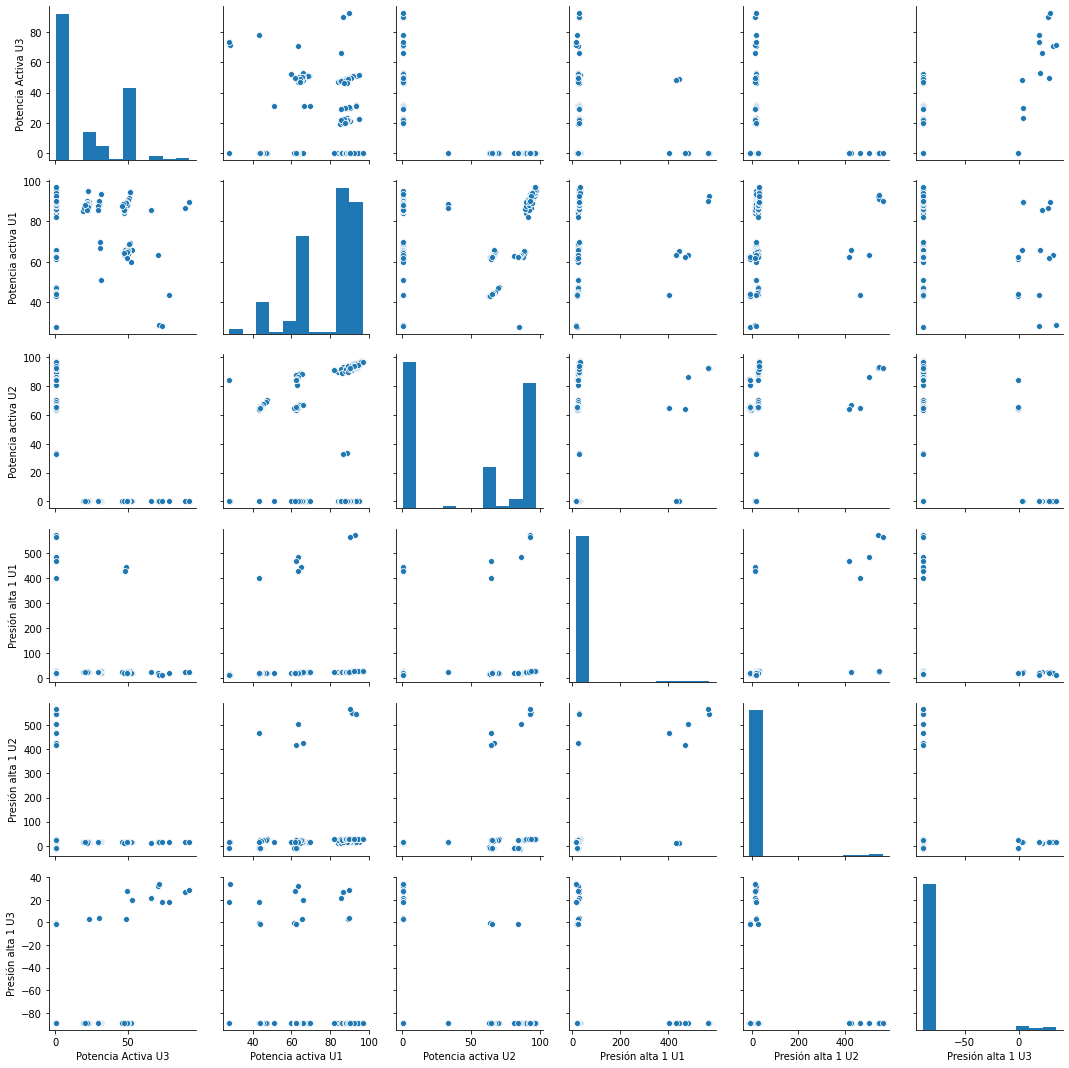

In [112]:
sns.pairplot(arranque_fe0.iloc[:,:6], palette="husl")

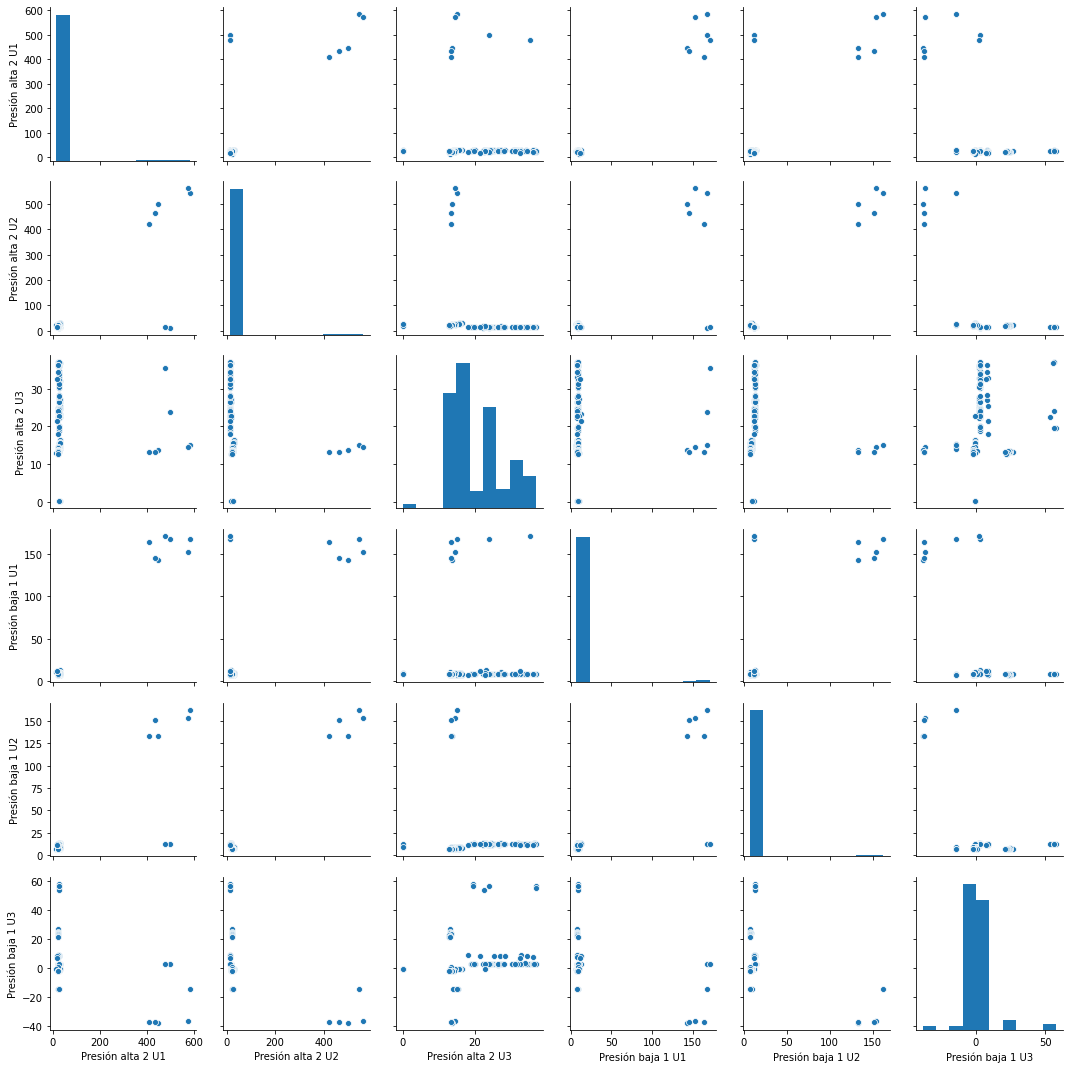

In [113]:
sns.pairplot(arranque_fe0.iloc[:,6:12], palette="husl")

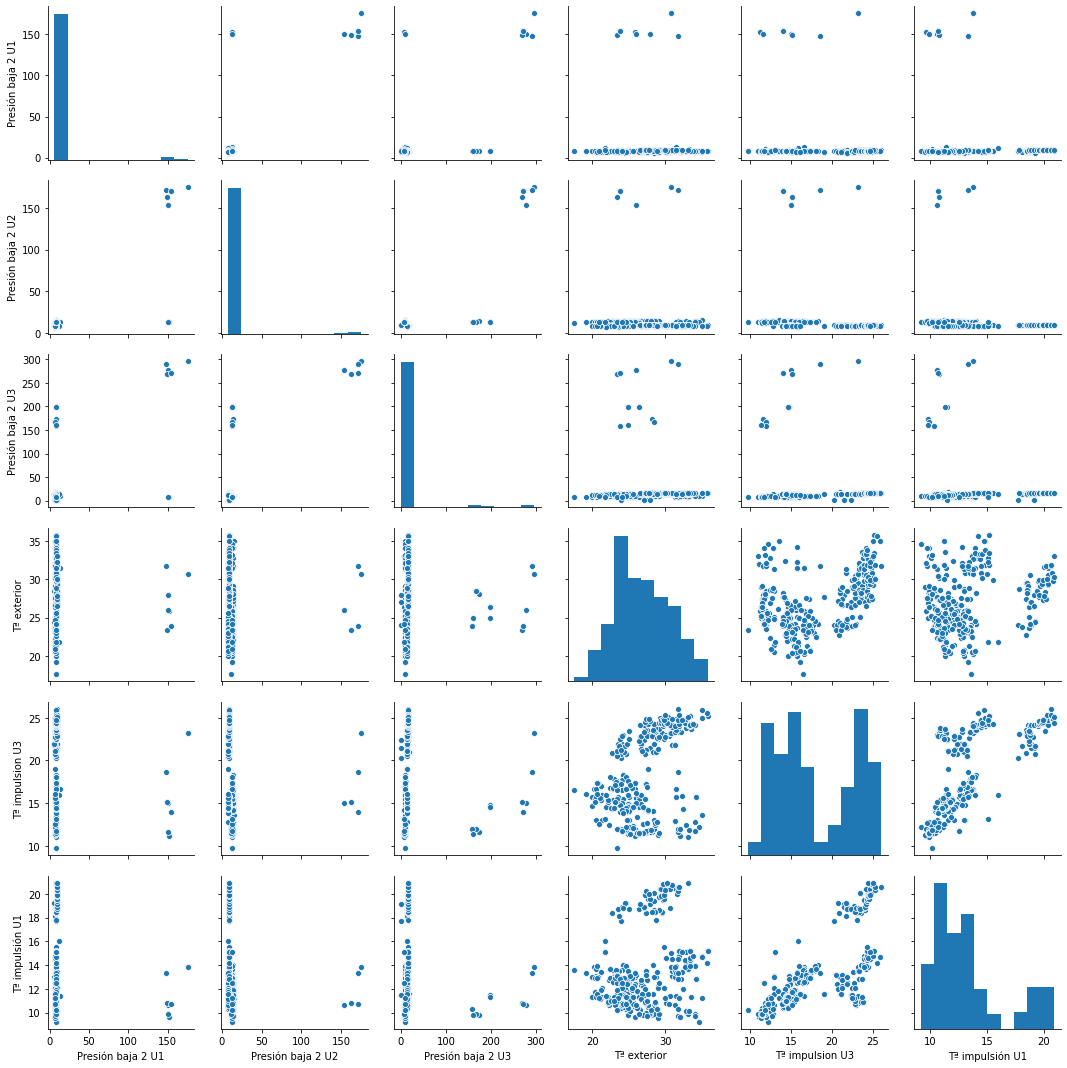

In [114]:
sns.pairplot(arranque_fe0.iloc[:,12:18], palette="husl")

C:\Users\edidd\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\edidd\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



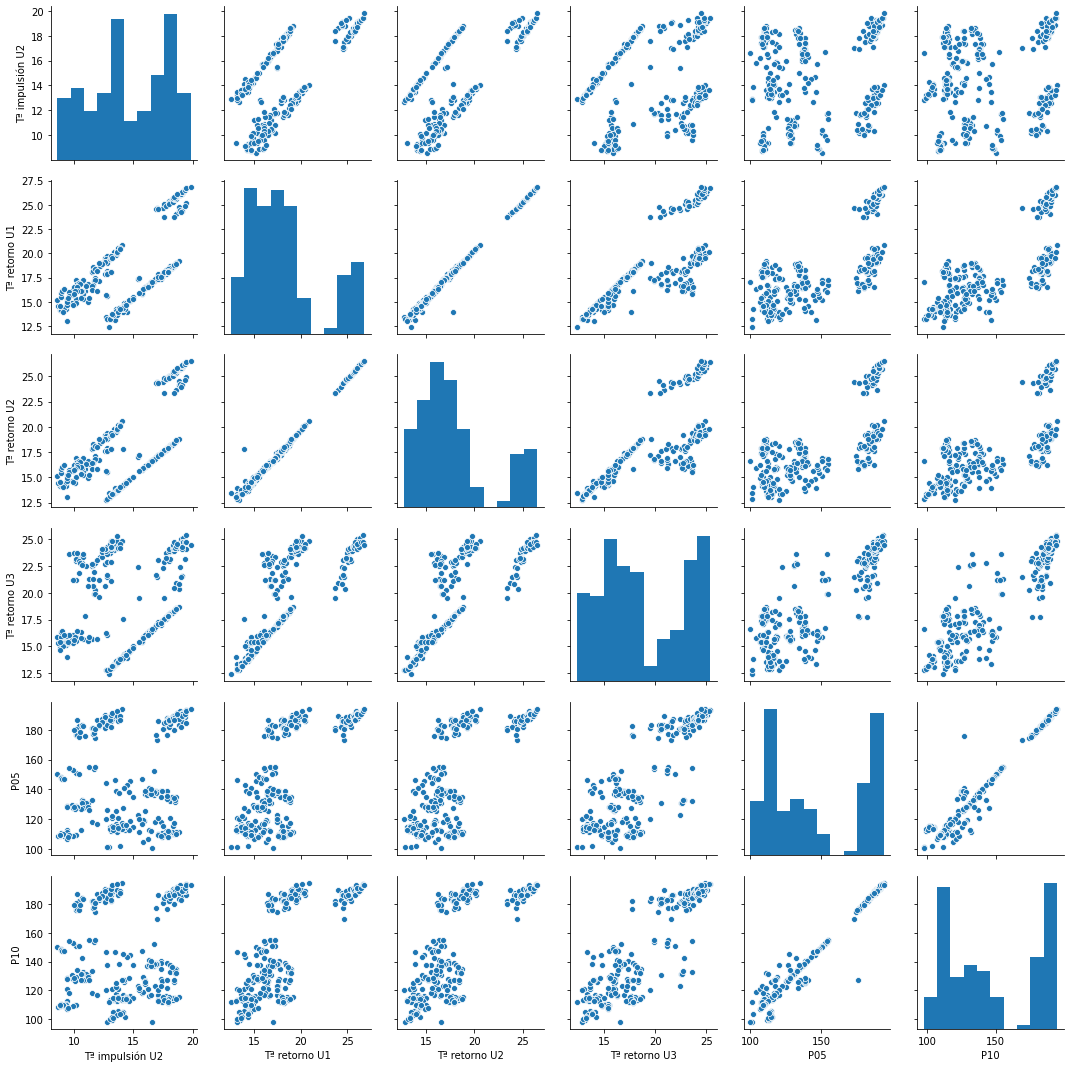

In [115]:
sns.pairplot(arranque_fe0.iloc[:,18:24], palette="husl")

C:\Users\edidd\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\edidd\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



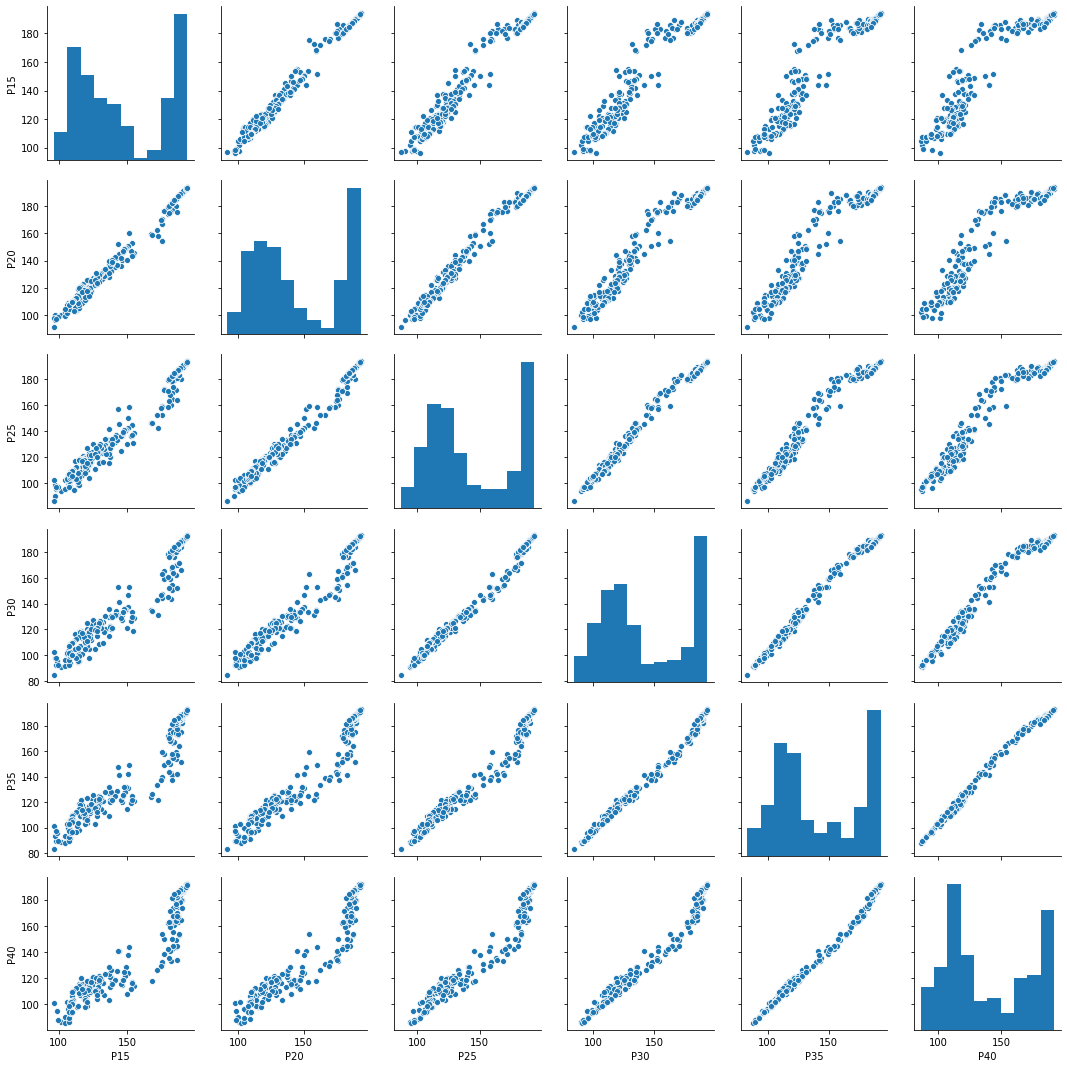

In [116]:
sns.pairplot(arranque_fe0.iloc[:,24:30], palette="husl")

C:\Users\edidd\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\edidd\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



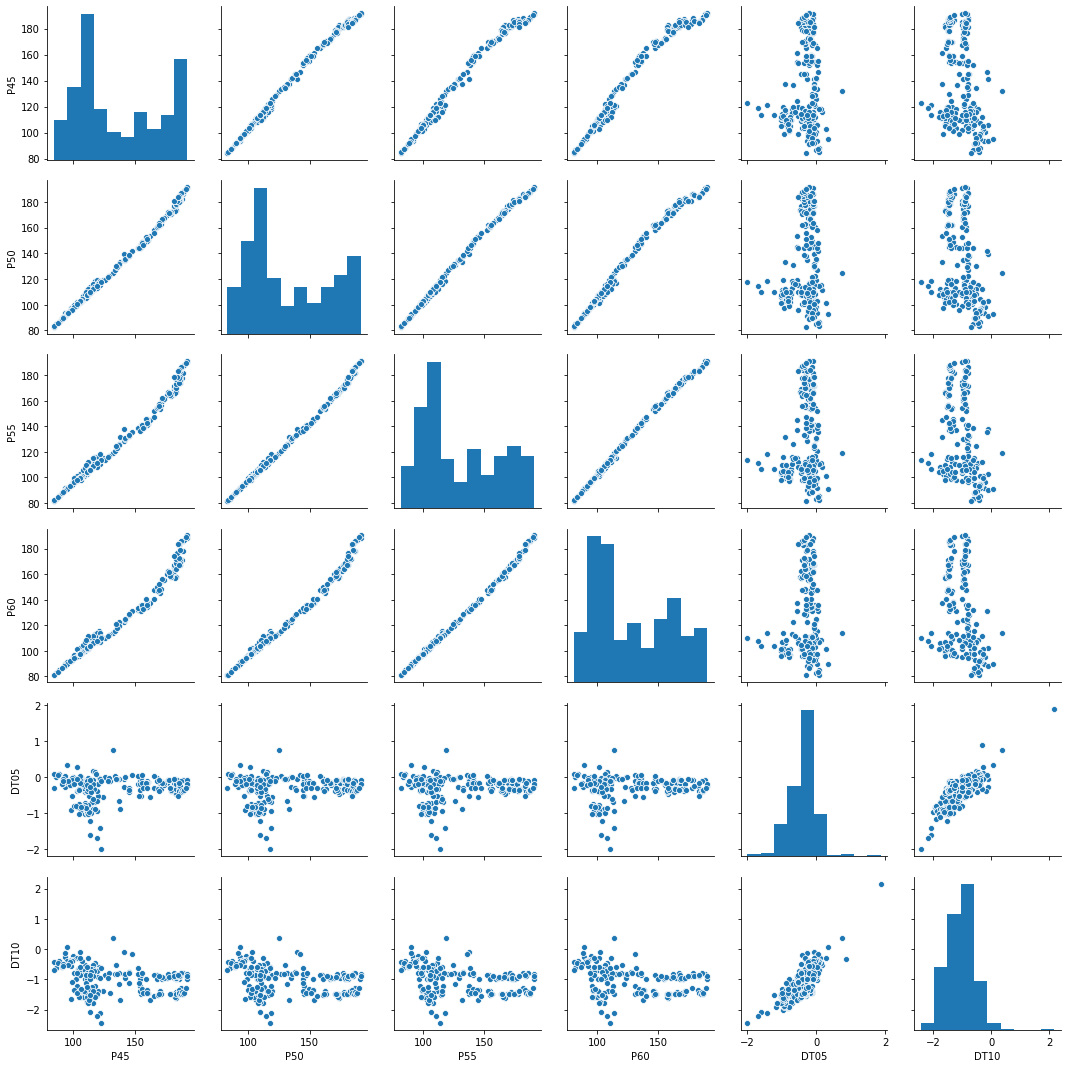

In [117]:
sns.pairplot(arranque_fe0.iloc[:,30:36], palette="husl")

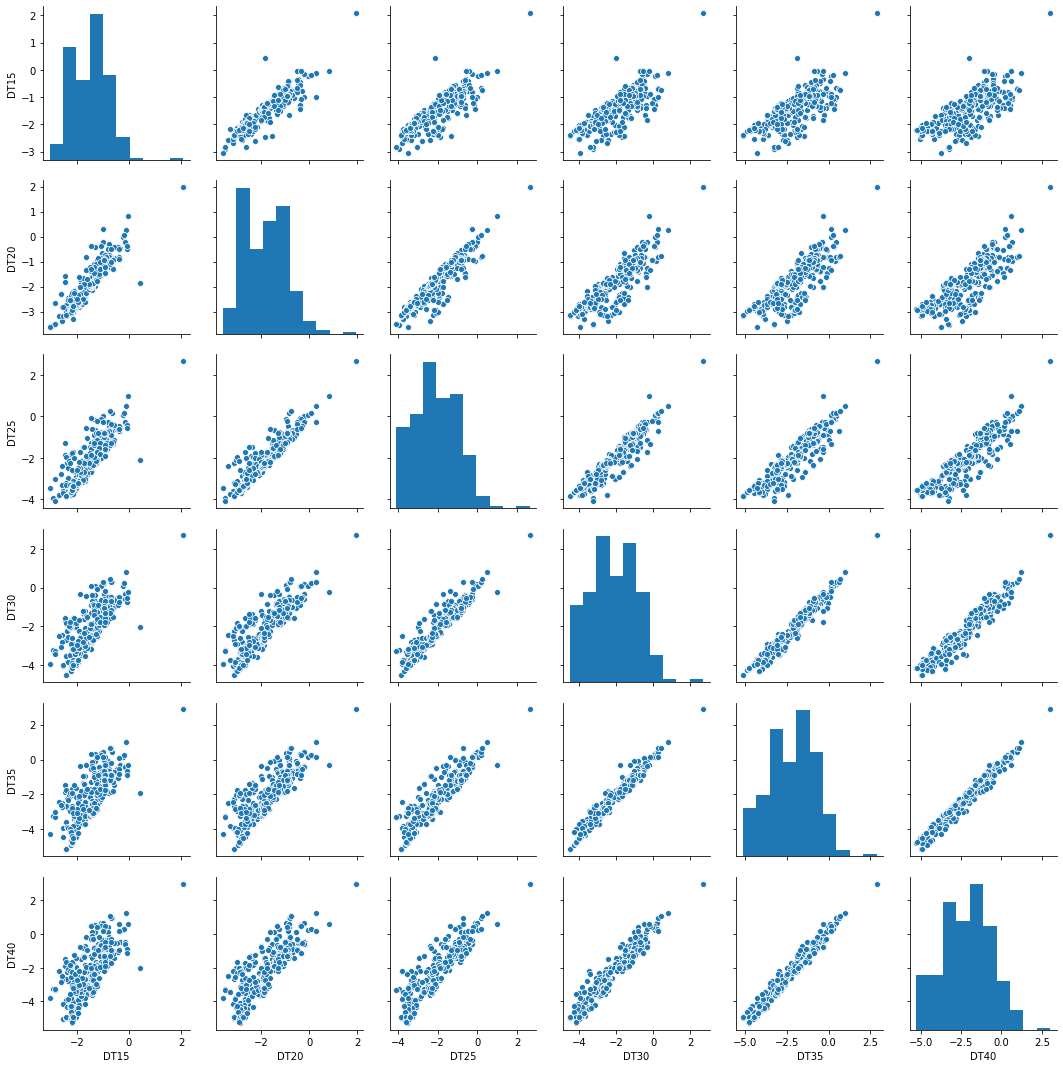

In [118]:
sns.pairplot(arranque_fe0.iloc[:,36:42], palette="husl")

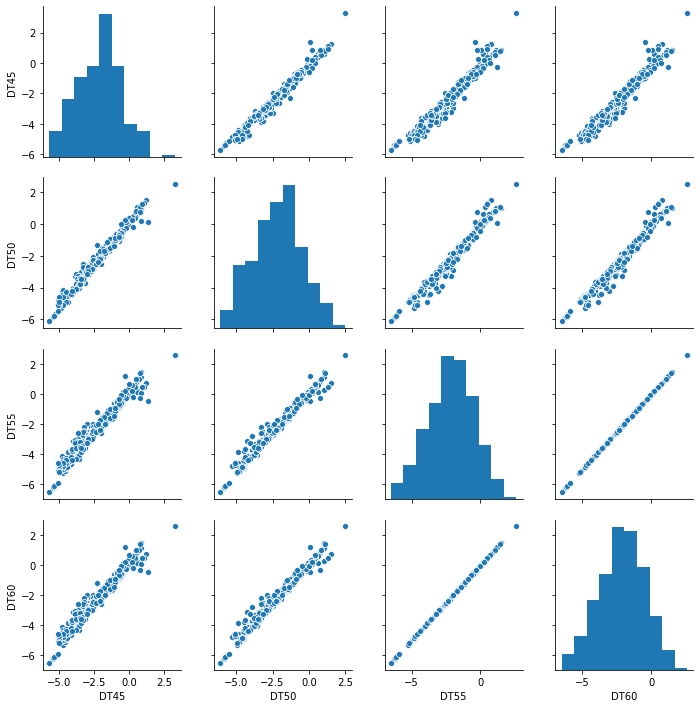

In [119]:
sns.pairplot(arranque_fe0.iloc[:,42:46], palette="husl")

In [132]:
arranque_fe0["DP_U1_c1"] = arranque_fe0["Presión alta 1 U1"] - arranque_fe0["Presión baja 1 U1"]

In [133]:
arranque_fe0["DP_U1_c2"] = arranque_fe0["Presión alta 2 U1"] - arranque_fe0["Presión baja 2 U1"]

In [134]:
arranque_fe0["DP_U2_c1"] = arranque_fe0["Presión alta 1 U2"] - arranque_fe0["Presión baja 1 U2"]

In [135]:
arranque_fe0["DP_U2_c2"] = arranque_fe0["Presión alta 2 U2"] - arranque_fe0["Presión baja 2 U2"]

In [136]:
arranque_fe0["DP_U3_c1"] = arranque_fe0["Presión alta 1 U3"] - arranque_fe0["Presión baja 1 U3"]

In [137]:
arranque_fe0["DP_U3_c2"] = arranque_fe0["Presión alta 2 U3"] - arranque_fe0["Presión baja 2 U3"]

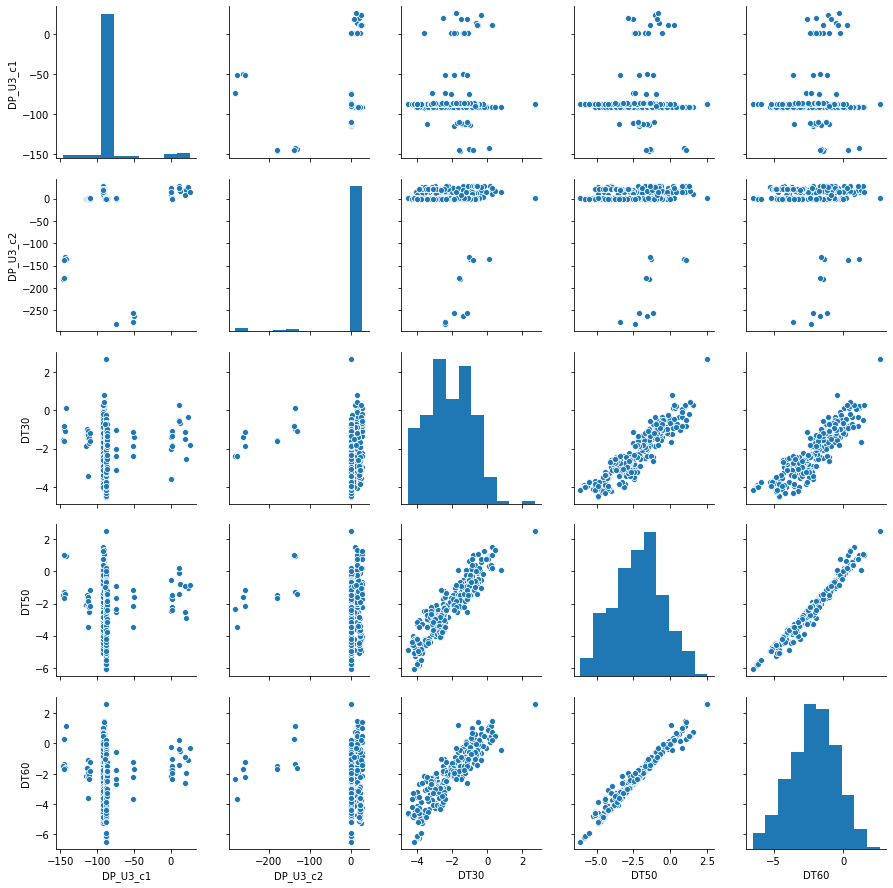

In [139]:
sns.pairplot(arranque_fe0.loc[:,["DP_U3_c1", "DP_U3_c2", "DT30", "DT50", "DT60"]], palette="husl")

## Taking out outliers

## <span style="background-color: #FFFF00">PCA using subset_arranque_v0 (Review chapter)</span>

### Dropping features not needed

In [ ]:
arranque_pca= arranque.drop(["datetime", "Consigna sistema", "Potencia Activa U3", "Potencia activa U1", 
                             "Potencia activa U2", "Presión alta 1 U1", "Presión alta 2 U1", "Presión alta 1 U2", 
                             "Presión alta 2 U2", "Presión alta 1 U3", "Presión alta 2 U3", "Presión baja 1 U1", 
                             "Presión baja 2 U1", "Presión baja 1 U2", "Presión baja 2 U2", "Presión baja 1 U3", 
                             "Presión baja 2 U3", "Tª impulsión U1", "Tª impulsión U2", "Tª impulsion U3", "Tª retorno U1", 
                             "Tª retorno U2", "Tª retorno U3", "Tª exterior", "Tª impulsión colector", "Potencia Enfriadoras"], axis= "columns")

In [ ]:
arranque_pca

### Example DT30

Droping all DTX and PX but the ones for 30min

In [ ]:
arranque_fe0[list(arranque_pca.filter(regex='P\d\d|DT\d\d'))]

In [ ]:
arranque_dt30 = arranque_pca[list(arranque_pca.columns.drop(list(arranque_pca.filter(regex='P\d\d|DT\d\d')))) + 
                             ["P30", "DT30"]]

Droping rows with NA. For these rows the "arranque" didn't reach the 30min duration

In [ ]:
arranque_dt30 = arranque_dt30.dropna()

In [ ]:
arranque_dt30

In [ ]:
arranque_dt30.describe()

> <span style="background-color: #FFFF00">**Note:** Verify for var. Ver - Inv = 1, then DT <= 0  
> Delete rows which don't comply with this  
> **this should be included in module "pre-processing"** </span>

In [ ]:
fig = go.Figure(data= [go.Histogram(x= arranque_dt30["DT30"])])
fig.update_layout(title="Frequency - DT30", xaxis_title="DT30")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= arranque_dt30["P30"], 
                        y= arranque_dt30["DT30"],
                        mode = "markers",
                        name = "DT30"))

fig.update_layout(title="DT30 vs P30")
fig.show()

#### Correlation matrix

In [ ]:
arranque_dt30_corr = arranque_dt30.corr()

In [ ]:
piv_corr = arranque_dt30_corr[arranque_dt30_corr!=1].unstack()

In [ ]:
piv_corr.sort_values(ascending= False).head(20)

In [ ]:
arranque_dt30_corr

#### Z-score normalization

In [ ]:
features = arranque_dt30.iloc[:, :len(arranque_dt30.columns) - 1]

In [ ]:
features_std = StandardScaler(with_mean=True, with_std=True).fit_transform(features)

In [ ]:
features_std

In [ ]:
features_std.shape

Create PCA instance

In [ ]:
pca = PCA()

Fit on the data

In [ ]:
pca.fit(features_std)

Apply dimensionality reduction to features to get all the observations in the new system of "principal" coordinates 

In [ ]:
pc_features = pca.transform(features_std)

In [ ]:
pc_features = PCA().fit_transform(features_std) # alternative procedure

Access values and vectors

In [ ]:
print("Principal components (eigenvectors):\n", pca.components_)
print("\nPrincipal components values (eigenvalues):\n", pca.explained_variance_)

In [ ]:
#amount of variance explained by each of the selected components
print("Amount of variance explained by each of the selected components:","\n",
      pca.explained_variance_, "\n")

#Percentage of variance explained by each of the selected components.
print("Percentage of variance explained by each of the selected components:","\n", 
      pca.explained_variance_ratio_, "\n")

#Cummulative percentage of variance
print("Cummulative percentage of variance:", "\n", 
     pca.explained_variance_ratio_.cumsum())

#Plot cumulative explained variance
plt.plot(np.arange(1,16), np.cumsum(pca.explained_variance_ratio_),
         linestyle='-', marker='o', color='b')
#plt.plot(np.arange(1,16), pca.explained_variance_ratio_,
#         linestyle='-', marker='o', color='r')
plt.title("Cumulative explained variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

With 6 principal components the explained variance is around 93%

Extracting only few number of principal components...

In [ ]:
pd.DataFrame(PCA(n_components= 2).fit(features_std).transform(features_std), columns= ["PC1", "PC2"])

### Creating feature space for different number of PCs

In [ ]:
pc6_features = pd.DataFrame(PCA(n_components= 6).fit_transform(features_std))

In [ ]:
pc5_features = pd.DataFrame(PCA(n_components= 5).fit_transform(features_std))

In [ ]:
pc7_features = pd.DataFrame(PCA(n_components= 7).fit_transform(features_std))

In [ ]:
for i in range(12, 16):
    df= pd.DataFrame(PCA(n_components= i).fit_transform(features_std))
    df.to_csv(os.path.join(datafilenamepath, "pc" + str(i) + "_features.csv"), index=False, header=True)

Copying csv:

In [ ]:
pc5_features.to_csv(os.path.join(datafilenamepath, "pc5_features.csv"), index=False, header=True)

In [ ]:
pc6_features.to_csv(os.path.join(datafilenamepath, "pc6_features.csv"), index=False, header=True)

In [ ]:
pc7_features.to_csv(os.path.join(datafilenamepath, "pc7_features.csv"), index=False, header=True)

In [ ]:
features_std = pd.DataFrame(features_std)

In [ ]:
features_std.to_csv(os.path.join(datafilenamepath, "features_std.csv"), index=False, header=True)

In [ ]:
dependent = arranque_dt30["DT30"]

In [ ]:
dependent.to_csv(os.path.join(datafilenamepath, "dependent.csv"), index=False, header=True)

In [ ]:
arranque_dt30.to_csv(os.path.join(datafilenamepath, "arranque_dt30.csv"), index= False, header= True)

## PCA using subset_arranque_v1

Dropping features not needed

In [ ]:
arranque_pca= arranque.drop(["datetime", "Consigna sistema", "Potencia Activa U3", "Potencia activa U1", 
                             "Potencia activa U2", "Presión alta 1 U1", "Presión alta 2 U1", "Presión alta 1 U2", 
                             "Presión alta 2 U2", "Presión alta 1 U3", "Presión alta 2 U3", "Presión baja 1 U1", 
                             "Presión baja 2 U1", "Presión baja 1 U2", "Presión baja 2 U2", "Presión baja 1 U3", 
                             "Presión baja 2 U3", "Tª impulsión U1", "Tª impulsión U2", "Tª impulsion U3", "Tª retorno U1", 
                             "Tª retorno U2", "Tª retorno U3", "Tª exterior", "Tª impulsión colector", "Potencia Enfriadoras"], axis= "columns")

In [46]:
arranque_fe0_pca = arranque_fe0.drop(["datetime", "Consigna sistema", "Tª impulsión colector", "Potencia Enfriadoras"], 
                                     axis= "columns")

> <span style="background-color: #FFFF00">This time keeping the original "Temp objetivo" as feature</span>

In [ ]:
arranque_fe0_pca = arranque_fe0.drop(["datetime", "Consigna sistema", "Potencia Enfriadoras"], 
                                     axis= "columns")

In [96]:
arranque_fe0_pca

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
0                 89.65               86.60                0.40   
1                 66.25               85.70                0.40   
2                 52.70               65.80                0.40   
3                 92.30               89.50                0.40   
4                 23.05               89.30                0.40   
..                  ...                 ...                 ...   
297               70.85               63.40                0.45   
298               49.60               61.65                0.40   
299               78.25               43.55                0.40   
300               71.25               28.65                0.45   
301               73.55               28.10                0.40   

     Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
0                 25.7               13.8               27.1   
1                 25.6               13.6               21.8   
2                 22.7               14.9               19.9   
3                 27.2               14.7               28.3   
4                 26.9               14.7                3.4   
..                 ...                ...                ...   
297               21.1               14.5               31.9   
298               22.6               14.1               28.1   
299               19.8               14.6               18.5   
300               14.7               13.8               34.4   
301               15.2               14.6               18.3   

     Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
0                 26.3               13.7               27.0   
1                 26.1               13.4               25.3   
2                 25.6               14.3               32.9   
3                 27.7               14.7               28.4   
4                 27.5               14.6               32.8   
..                 ...                ...                ...   
297               23.5               14.4               34.5   
298               20.9               14.2               18.1   
299               20.2               14.5               36.2   
300               18.3               13.6               21.4   
301               18.5               14.3               32.6   

     Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
0                  8.5               12.3                8.1   
1                  8.2               12.6                8.7   
2                  8.8               12.7                8.8   
3                  8.5               12.7                8.2   
4                  8.3               13.0                2.6   
..                 ...                ...                ...   
297                7.7               11.8                8.5   
298                7.1               11.8                8.9   
299                7.9               11.5                8.0   
300               11.9               12.1                8.7   
301               11.6               11.6                7.3   

     Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
0                  8.5               13.2                8.8    20.514667   
1                  8.3               13.2                8.7    21.373833   
2                  8.2               13.4                9.2    26.922067   
3                  8.6               13.4                8.9    25.071233   
4                  8.2               13.3                9.4    26.054267   
..                 ...                ...                ...          ...   
297                6.9               12.7                8.7    24.691800   
298                7.5               13.2                9.3    20.886700   
299                7.6               13.1                8.4    23.346733   
300                8.8               13.5                7.3    21.745067   
301                8.1               13.5     

In [95]:
arranque_fe0_pca.describe()

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
count          302.000000          302.000000          302.000000   
mean            19.247185           79.284727           47.248253   
std             22.939760           16.067652           43.613803   
min              0.450000           28.000000            0.400000   
25%              0.450000           65.112500            0.400000   
50%              0.450000           87.800000           64.775000   
75%             48.175000           91.075000           92.887500   
max             92.300000           96.700000           97.200000   

       Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
count         302.000000         302.000000         302.000000   
mean           36.264615          30.937748         -83.027483   
std            69.191487          79.269956          23.877314   
min            14.700000         -12.500000         -88.800000   
25%            23.800000          14.400000         -88.800000   
50%            26.600000          16.400000         -88.800000   
75%            28.100000          27.675000         -88.800000   
max           570.400000         565.300000          34.400000   

       Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
count         302.000000         302.000000         302.000000   
mean           37.051656          28.678813          20.213245   
std            70.444938          61.735198           7.370685   
min            14.600000          12.800000           0.100000   
25%            24.900000          14.500000          14.900000   
50%            27.100000          21.200000          15.800000   
75%            28.700000          27.500000          24.275000   
max           583.100000         562.100000          37.000000   

       Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
count         302.000000         302.000000         302.000000   
mean           11.803276          12.366325           2.152069   
std            22.768553          17.639054          10.193123   
min             6.500000           6.500000         -38.100000   
25%             8.000000           7.900000          -0.700000   
50%             8.300000           9.300000          -0.700000   
75%             8.600000          12.600000           2.800000   
max           171.000000         161.800000          58.000000   

       Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
count         302.000000         302.000000         302.000000   302.000000   
mean           11.493726          13.511058          19.604275    26.850539   
std            22.087815          20.046629          41.174835     3.742607   
min             6.100000           7.600000           0.200000    17.552633   
25%             7.600000           8.800000           8.800000    24.085683   
50%             8.100000           9.800000          13.300000    26.432250   
75%             8.500000          13.400000          15.000000    29.692158   
max           175.500000         174.600000         296.000000    35.786700   

       Tª impulsion U3  Tª impulsión U1  Tª impulsión U2  Tª retorno U1  \
count       302.000000       302.000000       302.000000     302.000000   
mean         18.077815        13.323271        14.610627      18.150662   
std           4.758535         3.162677         3.170759       3.825496   
min           9.700000         9.173077         8.600000      12.450000   
25%          14.300000        11.000000        12.400000      15.300000   
50%          16.700000        12.500000        14.126923      17.350000   
75%          23.200000        14.000000        17.700000      19.275000   
max          26.000000        20.900000        19.800000      26.800000   

       Tª retorno U2  Tª retorno U3         P05         P10         P15  \
count     302.000000     302.000000  302.000000  301.000000  301.000000   
mean       17.886424      18.822141  146.042211  146.509416  1

In [ ]:
arranque_fe0_pca.to_csv(os.path.join(datafilenamepath, "arranque_195_sin_t_obj.csv"), index = False)

### Example DT30

Droping all DTX and PX but the ones for 30min

In [ ]:
arranque_dt30 = arranque_pca[list(arranque_pca.columns.drop(list(arranque_pca.filter(regex='P\d\d|DT\d\d')))) + 
                             ["P30", "DT30"]]

In [47]:
arranque_fe0_dt30 = arranque_fe0_pca[list(arranque_fe0_pca.columns.drop(list(arranque_fe0_pca.filter(regex='P\d\d|DT\d\d')))) + 
                             ["P30", "DT30"]]

Droping rows with NA, rows where the power-on event didn't reach the 30min duration

In [ ]:
arranque_dt30 = arranque_dt30.dropna()

In [ ]:
arranque_dt30

In [48]:
arranque_fe0_dt30= arranque_fe0_dt30.dropna()

In [49]:
arranque_fe0_dt30

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
3                 92.30               89.50                0.40   
4                 23.05               89.30                0.40   
5                 30.15               89.60                0.40   
6                 48.50               65.65                0.40   
7                 48.80               87.45                0.40   
..                  ...                 ...                 ...   
294                0.45               44.00               65.00   
295                0.45               62.45               65.35   
296                0.45               62.45               84.15   
297               70.85               63.40                0.45   
300               71.25               28.65                0.45   

     Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
3                 27.2               14.7               28.3   
4                 26.9               14.7                3.4   
5                 27.1               14.9                3.5   
6                 22.4               15.1                3.3   
7                 26.4               14.8              -88.8   
..                 ...                ...                ...   
294               19.9               -8.3               -1.0   
295               20.8               -8.4               -1.0   
296               21.1               24.1               -1.0   
297               21.1               14.5               31.9   
300               14.7               13.8               34.4   

     Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
3                 27.7               14.7               28.4   
4                 27.5               14.6               32.8   
5                 27.7               14.6               19.9   
6                 25.3               14.9               23.8   
7                 27.0               14.5               36.1   
..                 ...                ...                ...   
294               20.1               20.9               13.6   
295               23.4               20.8               13.2   
296               23.5               24.1               12.8   
297               23.5               14.4               34.5   
300               18.3               13.6               21.4   

     Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
3                  8.5               12.7                8.2   
4                  8.3               13.0                2.6   
5                  8.3               13.2                2.8   
6                  8.5               13.0                2.6   
7                  8.2               13.0                2.7   
..                 ...                ...                ...   
294                8.0                6.6               -1.9   
295                7.8                6.9               -2.0   
296                8.1                6.7               -2.0   
297                7.7               11.8                8.5   
300               11.9               12.1                8.7   

     Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
3                  8.6               13.4                8.9    25.071233   
4                  8.2               13.3                9.4    26.054267   
5                  8.3               14.2               10.1    26.429167   
6                  7.9               14.1                8.2    25.197133   
7                  8.1               13.8                8.2    26.425067   
..                 ...                ...                ...          ...   
294                7.8                8.4               13.0    22.977533   
295                6.9                8.5               12.9    21.127967   
296                7.1                7.7               12.9    20.635067   
297                6.9               12.7                8.7    24.691800   
300                8.8               13.5     

In [50]:
fig = go.Figure(data= [go.Histogram(x= arranque_dt30["DT30"])])
fig.update_layout(title="Frequency - DT30", xaxis_title="DT30")
fig.show()

NameError: name 'arranque_dt30' is not defined

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= arranque_dt30["P30"], 
                        y= arranque_dt30["DT30"],
                        mode = "markers",
                        name = "DT30"))

fig.update_layout(title="DT30 vs P30")
fig.show()

### Correlation matrix

In [ ]:
arranque_dt30_corr = arranque_dt30.corr()

In [ ]:
piv_corr = arranque_dt30_corr[arranque_dt30_corr!=1].unstack()

In [ ]:
piv_corr.sort_values(ascending= False).head(20)

In [ ]:
arranque_dt30_corr

### PCA - engineered features

Z-score normalization

In [ ]:
features = arranque_dt30.iloc[:, :len(arranque_dt30.columns) - 1]

In [ ]:
features_fe0 = arranque_fe0_dt30.iloc[:, :len(arranque_fe0_dt30.columns) - 1]

In [ ]:
features_std = StandardScaler(with_mean=True, with_std=True).fit_transform(features)

In [ ]:
features_fe0_std = StandardScaler(with_mean=True, with_std=True).fit_transform(features_fe0)

Create PCA instance

In [ ]:
pca = PCA()

Fit on the data

In [ ]:
pca.fit(features_std)

Apply dimensionality reduction to features to get all the observations in the new system of "principal" coordinates 

In [ ]:
pc_features = pca.transform(features_std)

In [ ]:
pc_features = PCA().fit_transform(features_std)

In [ ]:
pc_features_fe0 = PCA().fit_transform(features_fe0_std)

#### Cummulative explained variance

Access values and vectors

In [ ]:
print("Principal components (eigenvectors):\n", pca.components_)
print("\nPrincipal components values (eigenvalues):\n", pca.explained_variance_)

In [ ]:
#amount of variance explained by each of the selected components
print("Amount of variance explained by each of the selected components:","\n",
      pca.explained_variance_, "\n")

#Percentage of variance explained by each of the selected components.
print("Percentage of variance explained by each of the selected components:","\n", 
      pca.explained_variance_ratio_)

#Plot cumulative explained variance
plt.plot(np.arange(1,16), np.cumsum(pca.explained_variance_ratio_),
         linestyle='-', marker='o', color='b')
#plt.plot(np.arange(1,16), pca.explained_variance_ratio_,
#         linestyle='-', marker='o', color='r')
plt.title("Cumulative explained variance - engineered features")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

With 6 principal components the explained variance is around 95%

#### Creating feature space for different number of PCs

In [ ]:
#for i in range(6, 16):
#    df= pd.DataFrame(PCA(n_components= i).fit_transform(features_std))
#    df.to_csv(os.path.join(datafilenamepath, "pc" + str(i) + "_features2.csv"), index=False, header=True)

In [ ]:
#for i in range(1, 24):
#    df= pd.DataFrame(PCA(n_components= i).fit_transform(features_fe0_std))
#    df.to_csv(os.path.join(datafilenamepath, "pc" + str(i) + "_fe0_features2.csv"), index=False, header=True)

In [ ]:
pc5_features = pd.DataFrame(PCA(n_components= 5).fit_transform(features_std))

In [ ]:
pc5_features.to_csv(os.path.join(datafilenamepath, "pc5_features2.csv"), index=False, header=True)

Copying csv:

In [ ]:
features_std = pd.DataFrame(features_std)

In [ ]:
features_std.to_csv(os.path.join(datafilenamepath, "features_std2.csv"), index=False, header=True)

In [ ]:
dependent = arranque_dt30["DT30"]

In [ ]:
dependent.to_csv(os.path.join(datafilenamepath, "dependent2.csv"), index=False, header=True)

In [ ]:
arranque_dt30.to_csv(os.path.join(datafilenamepath, "arranque_dt30_2.csv"), index= False, header= True)

In [ ]:
features_fe0_std = pd.DataFrame(features_fe0_std)

In [ ]:
features_fe0_std.to_csv(os.path.join(datafilenamepath, "features_fe0_std2.csv"), index=False, header=True)

### PCA - original features

Z-score normalization

In [51]:
features_fe0 = arranque_fe0_dt30.iloc[:, :len(arranque_fe0_dt30.columns) - 1]

In [52]:
features_fe0

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
3                 92.30               89.50                0.40   
4                 23.05               89.30                0.40   
5                 30.15               89.60                0.40   
6                 48.50               65.65                0.40   
7                 48.80               87.45                0.40   
..                  ...                 ...                 ...   
294                0.45               44.00               65.00   
295                0.45               62.45               65.35   
296                0.45               62.45               84.15   
297               70.85               63.40                0.45   
300               71.25               28.65                0.45   

     Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
3                 27.2               14.7               28.3   
4                 26.9               14.7                3.4   
5                 27.1               14.9                3.5   
6                 22.4               15.1                3.3   
7                 26.4               14.8              -88.8   
..                 ...                ...                ...   
294               19.9               -8.3               -1.0   
295               20.8               -8.4               -1.0   
296               21.1               24.1               -1.0   
297               21.1               14.5               31.9   
300               14.7               13.8               34.4   

     Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
3                 27.7               14.7               28.4   
4                 27.5               14.6               32.8   
5                 27.7               14.6               19.9   
6                 25.3               14.9               23.8   
7                 27.0               14.5               36.1   
..                 ...                ...                ...   
294               20.1               20.9               13.6   
295               23.4               20.8               13.2   
296               23.5               24.1               12.8   
297               23.5               14.4               34.5   
300               18.3               13.6               21.4   

     Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
3                  8.5               12.7                8.2   
4                  8.3               13.0                2.6   
5                  8.3               13.2                2.8   
6                  8.5               13.0                2.6   
7                  8.2               13.0                2.7   
..                 ...                ...                ...   
294                8.0                6.6               -1.9   
295                7.8                6.9               -2.0   
296                8.1                6.7               -2.0   
297                7.7               11.8                8.5   
300               11.9               12.1                8.7   

     Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
3                  8.6               13.4                8.9    25.071233   
4                  8.2               13.3                9.4    26.054267   
5                  8.3               14.2               10.1    26.429167   
6                  7.9               14.1                8.2    25.197133   
7                  8.1               13.8                8.2    26.425067   
..                 ...                ...                ...          ...   
294                7.8                8.4               13.0    22.977533   
295                6.9                8.5               12.9    21.127967   
296                7.1                7.7               12.9    20.635067   
297                6.9               12.7                8.7    24.691800   
300                8.8               13.5     

In [53]:
features_fe0.describe()

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
count          262.000000          262.000000          262.000000   
mean            14.939695           79.882205           53.934627   
std             20.721390           16.226444           42.680391   
min              0.450000           28.000000            0.400000   
25%              0.450000           65.150000            0.400000   
50%              0.450000           88.150000           66.675000   
75%             29.662500           91.687500           93.737500   
max             92.300000           96.700000           97.200000   

       Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
count         262.000000         262.000000         262.000000   
mean           36.508068          33.391985         -84.690076   
std            70.035641          84.856053          19.876578   
min            14.700000         -12.500000         -88.800000   
25%            24.025000          14.500000         -88.800000   
50%            26.900000          23.400000         -88.800000   
75%            28.375000          27.875000         -88.800000   
max           570.400000         565.300000          34.400000   

       Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
count         262.000000         262.000000         262.000000   
mean           37.121374          30.808785          19.567939   
std            70.405907          66.032552           7.556188   
min            14.600000          12.900000           0.100000   
25%            24.925000          14.800000          14.525000   
50%            27.300000          23.250000          15.650000   
75%            28.900000          27.600000          24.275000   
max           583.100000         562.100000          37.000000   

       Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
count         262.000000         262.000000         262.000000   
mean           11.717899          12.380268           1.352003   
std            22.334784          18.939365           9.204086   
min             6.500000           6.500000         -38.100000   
25%             8.000000           7.700000          -0.700000   
50%             8.400000           9.100000          -0.700000   
75%             8.600000          12.500000           2.800000   
max           167.800000         161.800000          56.700000   

       Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
count         262.000000         262.000000         262.000000   262.000000   
mean           11.497730          13.597861          19.222484    27.194327   
std            22.072734          21.523021          40.251600     3.819343   
min             6.100000           7.600000           0.200000    19.154667   
25%             7.600000           8.700000           9.400000    24.087742   
50%             8.100000           9.700000          13.650000    27.043300   
75%             8.500000          13.300000          15.100000    30.121042   
max           175.500000         174.600000         296.000000    35.786700   

       Tª impulsion U3  Tª impulsión U1  Tª impulsión U2  Tª retorno U1  \
count       262.000000       262.000000       262.000000     262.000000   
mean         18.774046        13.622625        14.521028      18.517557   
std           4.664911         3.275313         3.338810       3.937473   
min          11.000000         9.173077         8.600000      12.450000   
25%          14.825000        11.100000        11.800000      15.525000   
50%          17.450000        12.850000        13.900000      17.850000   
75%          23.475000        14.675000        17.875000      19.700000   
max          26.000000        20.900000        19.800000      26.800000   

       Tª retorno U2  Tª retorno U3         P30  
count     262.000000     262.000000  262.000000  
mean       18.262595      19.340407  141.341843  
std         3.891741       3.993526   34.014177  
min        1

In [54]:
features_fe0.iloc[:,0].mean()

14.939694656488435

In [55]:
features_fe0.iloc[:,0].std()

20.72139002345417

In [56]:
mean = features_fe0.describe().loc["mean"]

In [57]:
std = features_fe0.describe().loc["std"]

In [58]:
standardization = pd.concat([mean, std], axis= 1).T

In [59]:
standardization

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
mean           14.939695           79.882205           53.934627   
std            20.721390           16.226444           42.680391   

      Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
mean          36.508068          33.391985         -84.690076   
std           70.035641          84.856053          19.876578   

      Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
mean          37.121374          30.808785          19.567939   
std           70.405907          66.032552           7.556188   

      Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
mean          11.717899          12.380268           1.352003   
std           22.334784          18.939365           9.204086   

      Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
mean          11.497730          13.597861          19.222484    27.194327   
std           22.072734          21.523021          40.251600     3.819343   

      Tª impulsion U3  Tª impulsión U1  Tª impulsión U2  Tª retorno U1  \
mean        18.774046        13.622625        14.521028      18.517557   
std          4.664911         3.275313         3.338810       3.937473   

      Tª retorno U2  Tª retorno U3         P30  
mean      18.262595      19.340407  141.341843  
std        3.891741       3.993526   34.014177

In [60]:
features_fe0.describe().loc[["mean", "std"]]

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
mean           14.939695           79.882205           53.934627   
std            20.721390           16.226444           42.680391   

      Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
mean          36.508068          33.391985         -84.690076   
std           70.035641          84.856053          19.876578   

      Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
mean          37.121374          30.808785          19.567939   
std           70.405907          66.032552           7.556188   

      Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
mean          11.717899          12.380268           1.352003   
std           22.334784          18.939365           9.204086   

      Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
mean          11.497730          13.597861          19.222484    27.194327   
std           22.072734          21.523021          40.251600     3.819343   

      Tª impulsion U3  Tª impulsión U1  Tª impulsión U2  Tª retorno U1  \
mean        18.774046        13.622625        14.521028      18.517557   
std          4.664911         3.275313         3.338810       3.937473   

      Tª retorno U2  Tª retorno U3         P30  
mean      18.262595      19.340407  141.341843  
std        3.891741       3.993526   34.014177

In [61]:
feat_std = (features_fe0 - features_fe0.describe().loc["mean"]) / features_fe0.describe().loc["std"]

In [62]:
feat_std

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
3              3.733355            0.592724           -1.254314   
4              0.391398            0.580398           -1.254314   
5              0.734039            0.598886           -1.254314   
6              1.619597           -0.877099           -1.254314   
7              1.634075            0.466387           -1.254314   
..                  ...                 ...                 ...   
294           -0.699263           -2.211341            0.259261   
295           -0.699263           -1.074308            0.267462   
296           -0.699263           -1.074308            0.707945   
297            2.698193           -1.015762           -1.253143   
300            2.717497           -3.157328           -1.253143   

     Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
3            -0.132905          -0.220279           5.684584   
4            -0.137188          -0.220279           4.431853   
5            -0.134333          -0.217922           4.436884   
6            -0.201441          -0.215565           4.426822   
7            -0.144327          -0.219100          -0.206772   
..                 ...                ...                ...   
294          -0.237137          -0.491326           4.210487   
295          -0.224287          -0.492504           4.210487   
296          -0.220003          -0.109503           4.210487   
297          -0.220003          -0.222636           5.865702   
300          -0.311385          -0.230885           5.991478   

     Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
3            -0.133815          -0.243952           1.168851   
4            -0.136656          -0.245467           1.751156   
5            -0.133815          -0.245467           0.043946   
6            -0.167903          -0.240923           0.560079   
7            -0.143757          -0.246981           2.187884   
..                 ...                ...                ...   
294          -0.241761          -0.150059          -0.789808   
295          -0.194890          -0.151573          -0.842745   
296          -0.193469          -0.101598          -0.895682   
297          -0.193469          -0.248495           1.976137   
300          -0.267327          -0.260611           0.242458   

     Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
3            -0.144076           0.016882           0.744017   
4            -0.153030           0.032722           0.135592   
5            -0.153030           0.043282           0.157321   
6            -0.144076           0.032722           0.135592   
7            -0.157508           0.032722           0.146456   
..                 ...                ...                ...   
294          -0.166462          -0.305199          -0.353322   
295          -0.175417          -0.289359          -0.364186   
296          -0.161985          -0.299919          -0.364186   
297          -0.179894          -0.030638           0.776611   
300           0.008153          -0.014798           0.798341   

     Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
3            -0.131281          -0.009193          -0.256449    -0.555879   
4            -0.149403          -0.013839          -0.244027    -0.298497   
5            -0.144872           0.027977          -0.226637    -0.200338   
6            -0.162994           0.023330          -0.273840    -0.522916   
7            -0.153933           0.009392          -0.273840    -0.201412   
..                 ...                ...                ...          ...   
294          -0.167525          -0.241502          -0.154590    -1.104063   
295          -0.208299          -0.236856          -0.157074    -1.588326   
296          -0.199238          -0.274026          -0.157074    -1.717380   
297          -0.208299          -0.041716          -0.261418    -0.655225   
300          -0.122220          -0.004547     

In [63]:
feat_std.std()

Potencia Activa U3    1.0
Potencia activa U1    1.0
Potencia activa U2    1.0
Presión alta 1 U1     1.0
Presión alta 1 U2     1.0
Presión alta 1 U3     1.0
Presión alta 2 U1     1.0
Presión alta 2 U2     1.0
Presión alta 2 U3     1.0
Presión baja 1 U1     1.0
Presión baja 1 U2     1.0
Presión baja 1 U3     1.0
Presión baja 2 U1     1.0
Presión baja 2 U2     1.0
Presión baja 2 U3     1.0
Tª exterior           1.0
Tª impulsion U3       1.0
Tª impulsión U1       1.0
Tª impulsión U2       1.0
Tª retorno U1         1.0
Tª retorno U2         1.0
Tª retorno U3         1.0
P30                   1.0
dtype: float64

In [64]:
feat_std.mean()

Potencia Activa U3    4.017143e-15
Potencia activa U1   -6.830838e-16
Potencia activa U2    2.525546e-16
Presión alta 1 U1    -1.004286e-16
Presión alta 1 U2    -1.673810e-17
Presión alta 1 U3    -1.980773e-14
Presión alta 2 U1    -2.286127e-16
Presión alta 2 U2    -2.510714e-16
Presión alta 2 U3    -1.245823e-15
Presión baja 1 U1    -1.767167e-17
Presión baja 1 U2     4.713548e-17
Presión baja 1 U3    -5.012954e-16
Presión baja 2 U1    -1.897337e-16
Presión baja 2 U2    -5.656986e-16
Presión baja 2 U3     1.091154e-16
Tª exterior          -6.949488e-16
Tª impulsion U3      -5.000241e-17
Tª impulsión U1      -3.086166e-15
Tª impulsión U2      -6.763038e-16
Tª retorno U1        -7.705880e-16
Tª retorno U2        -3.085954e-15
Tª retorno U3         3.241682e-15
P30                   5.212116e-16
dtype: float64

In [65]:
scale = StandardScaler(with_mean=True, with_std=True).fit(features_fe0)

In [66]:
scale.mean_

array([ 14.93969466,  79.88220493,  53.93462713,  36.50806812,
        33.39198473, -84.69007634,  37.12137405,  30.80878454,
        19.56793893,  11.71789875,  12.38026806,   1.35200308,
        11.49773001,  13.59786082,  19.22248439,  27.19432728,
        18.7740458 ,  13.62262478,  14.5210276 ,  18.51755725,
        18.26259542,  19.34040712, 141.34184272])

In [67]:
scale.scale_

array([20.68180758, 16.19544796, 42.59886152, 69.9018572 , 84.69395945,
       19.83860973, 70.27141656, 65.90641474,  7.54175418, 22.29211983,
       18.9031867 ,  9.18650366, 22.03057013, 21.48190701, 40.17471062,
        3.81204676,  4.65599979,  3.26905641,  3.33243187,  3.92995165,
        3.88430657,  3.98589772, 33.9492027 ])

In [68]:
features_fe0_std = StandardScaler(with_mean=True, with_std=True).fit_transform(features_fe0)

In [69]:
features_fe0_std

array([[ 3.7405002 ,  0.59385792, -1.25671497, ..., -0.11909344,
        -0.41155274,  0.09474422],
       [ 0.39214683,  0.58150877, -1.25671497, ..., -0.47951813,
        -0.76279105, -0.86526851],
       [ 0.73544371,  0.6000325 , -1.25671497, ..., -0.27356116,
        -0.5871719 , -0.72633545],
       ...,
       [-0.70060098, -1.07636448,  0.70930001, ..., -0.53100737,
        -0.81296796, -0.22213857],
       [ 2.70335681, -1.01770602, -1.25554123, ..., -0.83994282,
        -1.13911782, -0.60309256],
       [ 2.72269748, -3.16337066, -1.25554123, ..., -0.42802889,
        -0.6875257 , -1.28654315]])

In [70]:
features_fe0_std_df = pd.DataFrame(features_fe0_std)

In [71]:
features_fe0_std.shape

(262, 23)

In [72]:
features_fe0_std_df.std()

0     1.001914
1     1.001914
2     1.001914
3     1.001914
4     1.001914
5     1.001914
6     1.001914
7     1.001914
8     1.001914
9     1.001914
10    1.001914
11    1.001914
12    1.001914
13    1.001914
14    1.001914
15    1.001914
16    1.001914
17    1.001914
18    1.001914
19    1.001914
20    1.001914
21    1.001914
22    1.001914
dtype: float64

In [73]:
features_fe0_std_df.mean()

0     1.615332e-15
1     1.154293e-15
2     4.000193e-16
3     4.322242e-17
4     4.311649e-17
5    -9.898782e-16
6     7.055425e-17
7    -6.843550e-17
8    -1.010642e-15
9    -8.478958e-17
10    1.563635e-16
11    6.059614e-17
12    2.441855e-17
13   -1.321303e-16
14    3.199307e-17
15   -8.135986e-16
16    6.051139e-16
17   -8.305485e-17
18   -9.830983e-17
19   -7.362643e-16
20   -4.430298e-16
21   -2.750133e-16
22    4.695142e-16
dtype: float64

Create PCA instance

In [74]:
pca = PCA()

Fit on the data

In [75]:
PCA().fit(feat_std).components_

array([[-3.56987553e-02, -3.16240862e-02,  3.45926717e-02,
         3.37028380e-01,  2.74569926e-01, -1.39520329e-02,
         3.32948971e-01,  3.36667042e-01, -4.19610632e-02,
         3.31250641e-01,  3.34101724e-01, -1.79036471e-01,
         3.34860505e-01,  3.35115928e-01,  3.08331159e-01,
         8.34345235e-03, -1.48509990e-02, -3.33637050e-02,
        -6.69822794e-02, -3.37530431e-02, -3.25274163e-02,
        -1.75886154e-02,  9.64589421e-03],
       [ 2.51391846e-01, -2.28645697e-01, -2.93174841e-01,
        -1.77043484e-03, -5.50345745e-02,  7.93570003e-02,
        -1.35495448e-04, -3.18353265e-02,  2.03643632e-01,
         1.21075433e-02,  1.78801590e-02,  1.22815907e-01,
         7.46115002e-03,  1.84368783e-02,  8.38158701e-03,
        -1.57312535e-01, -3.48954755e-01, -3.20104197e-01,
        -1.39742219e-01, -3.32978111e-01, -3.33176463e-01,
        -3.47078021e-01, -3.46246794e-01],
       [ 3.82181213e-01,  3.43785841e-01, -3.50832619e-01,
         4.50515235e-02,  1.3

In [76]:
pca.fit(features_fe0_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Apply dimensionality reduction to features to get all the observations in the new system of "principal" coordinates 

In [77]:
pc_features_fe0 = pca.transform(features_fe0_std)

In [78]:
pc_features_fe0 = PCA().fit_transform(features_fe0_std)

#### Cummulative explained variance

Access values and vectors

In [79]:
print("Principal components (eigenvectors):\n", pca.components_)

Principal components (eigenvectors):
 [[-3.56987553e-02 -3.16240862e-02  3.45926717e-02  3.37028380e-01
   2.74569926e-01 -1.39520329e-02  3.32948971e-01  3.36667042e-01
  -4.19610632e-02  3.31250641e-01  3.34101724e-01 -1.79036471e-01
   3.34860505e-01  3.35115928e-01  3.08331159e-01  8.34345235e-03
  -1.48509990e-02 -3.33637050e-02 -6.69822794e-02 -3.37530431e-02
  -3.25274163e-02 -1.75886154e-02  9.64589421e-03]
 [ 2.51391846e-01 -2.28645697e-01 -2.93174841e-01 -1.77043484e-03
  -5.50345745e-02  7.93570003e-02 -1.35495448e-04 -3.18353265e-02
   2.03643632e-01  1.21075433e-02  1.78801590e-02  1.22815907e-01
   7.46115002e-03  1.84368783e-02  8.38158701e-03 -1.57312535e-01
  -3.48954755e-01 -3.20104197e-01 -1.39742219e-01 -3.32978111e-01
  -3.33176463e-01 -3.47078021e-01 -3.46246794e-01]
 [ 3.82181213e-01  3.43785841e-01 -3.50832619e-01  4.50515235e-02
   1.30032588e-02 -1.47023950e-02  4.85150761e-02 -6.34639388e-03
   4.32115259e-01  3.74014868e-02  8.61298767e-02  3.57756203e-02
  

In [80]:
pca.components_.shape

(23, 23)

In [81]:
print("\nPrincipal components values (eigenvalues):\n", pca.explained_variance_)


Principal components values (eigenvalues):
 [8.40216154e+00 7.37639346e+00 2.58307528e+00 1.31251123e+00
 9.15979782e-01 7.34076548e-01 4.79202093e-01 3.98570874e-01
 2.88215700e-01 2.12549792e-01 1.45443776e-01 1.05248719e-01
 5.03551389e-02 3.80568051e-02 1.68281858e-02 1.31044683e-02
 7.50451309e-03 2.99678353e-03 2.08154903e-03 1.73040562e-03
 1.56685271e-03 3.02073329e-04 1.67033417e-04]


Amount of variance explained by each of the selected components: 
 [8.40216154e+00 7.37639346e+00 2.58307528e+00 1.31251123e+00
 9.15979782e-01 7.34076548e-01 4.79202093e-01 3.98570874e-01
 2.88215700e-01 2.12549792e-01 1.45443776e-01 1.05248719e-01
 5.03551389e-02 3.80568051e-02 1.68281858e-02 1.31044683e-02
 7.50451309e-03 2.99678353e-03 2.08154903e-03 1.73040562e-03
 1.56685271e-03 3.02073329e-04 1.67033417e-04] 

Percentage of variance explained by each of the selected components: 
 [3.63917053e-01 3.19488665e-01 1.11878966e-01 5.68478977e-02
 3.96732033e-02 3.17945535e-02 2.07553512e-02 1.72630266e-02
 1.24832887e-02 9.20602317e-03 6.29950641e-03 4.55856550e-03
 2.18099755e-03 1.64832827e-03 7.28867654e-04 5.67584838e-04
 3.25037822e-04 1.29797627e-04 9.01567036e-05 7.49478702e-05
 6.78640154e-05 1.30834947e-05 7.23460370e-06]


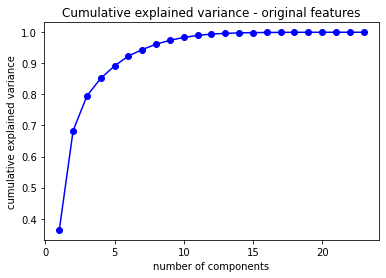

In [82]:
#amount of variance explained by each of the selected components
print("Amount of variance explained by each of the selected components:","\n",
      pca.explained_variance_, "\n")

#Percentage of variance explained by each of the selected components.
print("Percentage of variance explained by each of the selected components:","\n", 
      pca.explained_variance_ratio_)

#Plot cumulative explained variance
plt.plot(np.arange(1,24), np.cumsum(pca.explained_variance_ratio_),
         linestyle='-', marker='o', color='b')
#plt.plot(np.arange(1,16), pca.explained_variance_ratio_,
#         linestyle='-', marker='o', color='r')
plt.title("Cumulative explained variance - original features")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Projecting original data on the PC feature space

In [83]:
pd.DataFrame(pc_features_fe0)

0         1         2         3         4         5         6  \
0   -0.888083  2.607825  3.041052  2.323265  5.073681  1.697025 -0.056946   
1   -0.613447  2.351341  1.561302  1.582271  3.699398  0.638441 -0.505358   
2   -0.569497  1.718642  1.200878  1.956731  3.671554  0.708523 -0.188466   
3   -0.458015  4.262778  0.348755  1.944154  3.643511  0.552309 -0.047444   
4   -0.604175  2.602165  2.174828 -0.724497  0.015012 -0.394387 -0.287984   
..        ...       ...       ...       ...       ...       ...       ...   
257 -0.326689  2.877132 -2.940784  2.884181  2.967563  0.293990  0.189648   
258 -0.401921  2.062532 -2.306633  2.964217  2.967589  0.235080 -0.149557   
259 -0.266796  1.579896 -2.561359  3.022414  3.010309  0.358496 -0.371518   
260 -0.825774  4.277615  1.630550  2.422300  4.944556  1.623467 -0.160125   
261 -0.783825  3.791474  0.785646  4.626804  4.187830  1.625923  0.449019   

            7         8         9        10        11        12        13  \
0    0.375765  0.394051  0.776660  1.060078 -0.794548 -0.060573 -0.162797   
1    0.843006 -0.437269 -0.540032 -1.236318  0.402377 -0.017960  0.037327   
2    0.551288 -0.119323  0.818738 -0.697562  0.807416 -0.005948  0.191148   
3   -0.080639  0.052277  0.313539 -0.164346  0.344841  0.052522 -0.164506   
4    0.236178 -0.136739 -0.508471  0.104214 -0.273411  0.099439 -0.455299   
..        ...       ...       ...       ...       ...       ...       ...   
257 -0.148886 -0.302009 -0.338905 -0.624540  0.317173  0.198010 -0.078061   
258  0.596795 -0.399373  0.160857 -0.762428 -0.126747  0.243848  0.064844   
259  0.523576 -0.131812  0.069198 -0.668452 -0.605130  0.226867  0.029593   
260  0.042973  0.144817 -0.636266  0.430261 -0.500685 -0.244269 -0.055164   
261 -1.067481  0.631178 -0.530161  1.633634  0.735218 -0.439056  0.017068   

           14        15        16        17        18        19        20  \
0    0.071834  0.049924  0.020080 -0.169867  0.067474  0.033342  0.109397   
1    0.021338  0.047453  0.011226 -0.003476  0.027298  0.015949  0.050060   
2    0.020246 -0.001811 -0.011746 -0.014763  0.013640  0.009687  0.021977   
3    0.020545  0.043881  0.030500 -0.003004 -0.005139 -0.014586  0.048376   
4    0.059115  0.020886  0.018143  0.120430 -0.016042  0.021426 -0.026064   
..        ...       ...       ...       ...       ...       ...       ...   
257 -0.042852 -0.100636 -0.057472  0.073421  0.005448  0.010593 -0.010112   
258 -0.019241 -0.129362 -0.040969  0.121530 -0.034852  0.000827 -0.017587   
259  0.011219 -0.090748 -0.057874  0.140766 -0.020962 -0.019273 -0.009272   
260 -0.010471  0.024666  0.244398 -0.058375 -0.013374 -0.000898 -0.068275   
261 -0.014926  0.250542 -0.051244 -0.128102 -0.027835 -0.014569 -0.045184   

           21        22  
0    0.003805 -0.006100  
1   -0.002493  0.008868  
2   -0.005795 -0.024489  
3    0.003758 -0.014326  
4    0.001752 -0.000986  
..        ...       ...  
257  0.006128 -0.019670  
258  0.012676 -0.000882  
259  0.011761  0.018123  
260 -0.001125 -0.001529  
261 -0.037791  0.040534  

[262 rows x 23 columns]

In [84]:
pd.DataFrame(pca.components_.dot(features_fe0_std.T).T)

0         1         2         3         4         5         6  \
0   -0.888083  2.607825  3.041052  2.323265  5.073681  1.697025 -0.056946   
1   -0.613447  2.351341  1.561302  1.582271  3.699398  0.638441 -0.505358   
2   -0.569497  1.718642  1.200878  1.956731  3.671554  0.708523 -0.188466   
3   -0.458015  4.262778  0.348755  1.944154  3.643511  0.552309 -0.047444   
4   -0.604175  2.602165  2.174828 -0.724497  0.015012 -0.394387 -0.287984   
..        ...       ...       ...       ...       ...       ...       ...   
257 -0.326689  2.877132 -2.940784  2.884181  2.967563  0.293990  0.189648   
258 -0.401921  2.062532 -2.306633  2.964217  2.967589  0.235080 -0.149557   
259 -0.266796  1.579896 -2.561359  3.022414  3.010309  0.358496 -0.371518   
260 -0.825774  4.277615  1.630550  2.422300  4.944556  1.623467 -0.160125   
261 -0.783825  3.791474  0.785646  4.626804  4.187830  1.625923  0.449019   

            7         8         9        10        11        12        13  \
0    0.375765  0.394051  0.776660  1.060078 -0.794548 -0.060573 -0.162797   
1    0.843006 -0.437269 -0.540032 -1.236318  0.402377 -0.017960  0.037327   
2    0.551288 -0.119323  0.818738 -0.697562  0.807416 -0.005948  0.191148   
3   -0.080639  0.052277  0.313539 -0.164346  0.344841  0.052522 -0.164506   
4    0.236178 -0.136739 -0.508471  0.104214 -0.273411  0.099439 -0.455299   
..        ...       ...       ...       ...       ...       ...       ...   
257 -0.148886 -0.302009 -0.338905 -0.624540  0.317173  0.198010 -0.078061   
258  0.596795 -0.399373  0.160857 -0.762428 -0.126747  0.243848  0.064844   
259  0.523576 -0.131812  0.069198 -0.668452 -0.605130  0.226867  0.029593   
260  0.042973  0.144817 -0.636266  0.430261 -0.500685 -0.244269 -0.055164   
261 -1.067481  0.631178 -0.530161  1.633634  0.735218 -0.439056  0.017068   

           14        15        16        17        18        19        20  \
0    0.071834  0.049924  0.020080 -0.169867  0.067474  0.033342  0.109397   
1    0.021338  0.047453  0.011226 -0.003476  0.027298  0.015949  0.050060   
2    0.020246 -0.001811 -0.011746 -0.014763  0.013640  0.009687  0.021977   
3    0.020545  0.043881  0.030500 -0.003004 -0.005139 -0.014586  0.048376   
4    0.059115  0.020886  0.018143  0.120430 -0.016042  0.021426 -0.026064   
..        ...       ...       ...       ...       ...       ...       ...   
257 -0.042852 -0.100636 -0.057472  0.073421  0.005448  0.010593 -0.010112   
258 -0.019241 -0.129362 -0.040969  0.121530 -0.034852  0.000827 -0.017587   
259  0.011219 -0.090748 -0.057874  0.140766 -0.020962 -0.019273 -0.009272   
260 -0.010471  0.024666  0.244398 -0.058375 -0.013374 -0.000898 -0.068275   
261 -0.014926  0.250542 -0.051244 -0.128102 -0.027835 -0.014569 -0.045184   

           21        22  
0    0.003805 -0.006100  
1   -0.002493  0.008868  
2   -0.005795 -0.024489  
3    0.003758 -0.014326  
4    0.001752 -0.000986  
..        ...       ...  
257  0.006128 -0.019670  
258  0.012676 -0.000882  
259  0.011761  0.018123  
260 -0.001125 -0.001529  
261 -0.037791  0.040534  

[262 rows x 23 columns]

In [85]:
pd.DataFrame(pca.components_.dot(features_fe0_std.T).T) / pd.DataFrame(pc_features_fe0)

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
257  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
258  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
259  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
260  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
261  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

      14   15   16   17   18   19   20   21   22  
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  
257  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
258  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
259  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
260  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
261  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[262 rows x 23 columns]

In [88]:
arranque_fe0_pca

Potencia Activa U3  Potencia activa U1  Potencia activa U2  \
0                 89.65               86.60                0.40   
1                 66.25               85.70                0.40   
2                 52.70               65.80                0.40   
3                 92.30               89.50                0.40   
4                 23.05               89.30                0.40   
..                  ...                 ...                 ...   
297               70.85               63.40                0.45   
298               49.60               61.65                0.40   
299               78.25               43.55                0.40   
300               71.25               28.65                0.45   
301               73.55               28.10                0.40   

     Presión alta 1 U1  Presión alta 1 U2  Presión alta 1 U3  \
0                 25.7               13.8               27.1   
1                 25.6               13.6               21.8   
2                 22.7               14.9               19.9   
3                 27.2               14.7               28.3   
4                 26.9               14.7                3.4   
..                 ...                ...                ...   
297               21.1               14.5               31.9   
298               22.6               14.1               28.1   
299               19.8               14.6               18.5   
300               14.7               13.8               34.4   
301               15.2               14.6               18.3   

     Presión alta 2 U1  Presión alta 2 U2  Presión alta 2 U3  \
0                 26.3               13.7               27.0   
1                 26.1               13.4               25.3   
2                 25.6               14.3               32.9   
3                 27.7               14.7               28.4   
4                 27.5               14.6               32.8   
..                 ...                ...                ...   
297               23.5               14.4               34.5   
298               20.9               14.2               18.1   
299               20.2               14.5               36.2   
300               18.3               13.6               21.4   
301               18.5               14.3               32.6   

     Presión baja 1 U1  Presión baja 1 U2  Presión baja 1 U3  \
0                  8.5               12.3                8.1   
1                  8.2               12.6                8.7   
2                  8.8               12.7                8.8   
3                  8.5               12.7                8.2   
4                  8.3               13.0                2.6   
..                 ...                ...                ...   
297                7.7               11.8                8.5   
298                7.1               11.8                8.9   
299                7.9               11.5                8.0   
300               11.9               12.1                8.7   
301               11.6               11.6                7.3   

     Presión baja 2 U1  Presión baja 2 U2  Presión baja 2 U3  Tª exterior  \
0                  8.5               13.2                8.8    20.514667   
1                  8.3               13.2                8.7    21.373833   
2                  8.2               13.4                9.2    26.922067   
3                  8.6               13.4                8.9    25.071233   
4                  8.2               13.3                9.4    26.054267   
..                 ...                ...                ...          ...   
297                6.9               12.7                8.7    24.691800   
298                7.5               13.2                9.3    20.886700   
299                7.6               13.1                8.4    23.346733   
300                8.8               13.5                7.3    21.745067   
301                8.1               13.5     

## Probando cosas

Probando la funcion extract_data 

In [145]:
prueba = pd.read_csv(os.path.join(datafilenamepath, "508_df_2020-02-01_to_2020-02-01.csv"))

In [146]:
prueba

Control_compuerta_1_maq_24             datetime  \
0                           0.0  2020-02-01 00:00:00   
1                           0.0  2020-02-01 00:05:00   
2                           0.0  2020-02-01 00:10:00   
3                           0.0  2020-02-01 00:15:00   
4                           0.0  2020-02-01 00:20:00   
..                          ...                  ...   
285                         0.0  2020-02-01 23:35:00   
286                         0.0  2020-02-01 23:40:00   
287                         0.0  2020-02-01 23:45:00   
288                         0.0  2020-02-01 23:50:00   
289                         0.0  2020-02-01 23:55:00   

     Control_compuerta_2_maq_92  Control_compuerta_3_maq_280  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   
..                          ...                          ...   
285                         0.0                          0.0   
286                         0.0                          0.0   
287                         0.0                          0.0   
288                         0.0                          0.0   
289                         0.0                          0.0   

     Control_modo_func_instalacion_382  Control_modo_func_instalacion_428  \
0                                  4.0                                0.0   
1                                  NaN                                NaN   
2                                  NaN                                NaN   
3                                  4.0                                0.0   
4                                  NaN                                NaN   
..                                 ...                                ...   
285                                NaN                                NaN   
286                                NaN                                NaN   
287                                4.0                                0.0   
288                                NaN                                NaN   
289                                NaN                                NaN   

     Control_compuerta_4_maq_786  Control_modo_func_instalacion_955  \
0                            0.0                                0.0   
1                            0.0                                NaN   
2                            0.0                                0.0   
3                            0.0                                NaN   
4                            0.0                                0.0   
..                           ...                                ...   
285                          0.0                                NaN   
286                          0.0                                0.0   
287                          0.0                                NaN   
288                          0.0                                0.0   
289                          0.0                                NaN   

     potencia_electrica_activa_1_maq_1  potencia_electrica_activa_2_maq_27  \
0                                 0.04                                 0.0   
1                                 0.04                                 0.0   
2                                 0.04                                 0.0   
3                                 0.04                                 0.0   
4                                 0.08                                 0.0   
..                                 ...                                 ...   
285                               0.04                                 0.0   
286                               0.04                                 0.0   
287                               0.04                                 0.0   
288  

In [ ]:
prueba2 = pd.read_csv(os.path.join(datafilenamepath, "195_df_2020-02-01_to_2020-02-01.csv"))

In [ ]:
prueba2